# Drug Discovery Project:  Human Growth Factor Receptors as Chemotherapy Targets

### The Goal of this Project:  To learn to employ data science technologies, techniques and methodologies to solve a scientifically signficant and realistic problem.

**This Jupyter Notebook describes the exploration leading to and development of a prototype "pipeline" attempting to discover five good drug candidates for each of fourteen different human genes/gene products.**

The unusual increase in human growth factor receptor activity has been implicated in the cause of many diseases, particularly various cancers. This may occur through gain-of-function mutations which cause either an increase in the number of receptors or the increased activity of the existing ones.  In either case, this is a good target for the use of inhibitory agents to temper the growth promoting impact of these effects.  In fact, several FDA-approved drugs are already in use targeting some of the human growth factor receptor family members.  However, several have not yet been targeted effectively and new classes of drugs are always welcome to either increase effectiveness, decrease side-effects or decrease cost.

This project explores data in the U.S. National Library of Medicine's public repositories MedGen (diseases), Gene (genes) and PubChem (chemicals and chemical activities) in order to predict strongly interacting, inhibitory chemical compounds for fourteen of the human growth factor receptor family members. This information can be used for future experimental testing to facilitate the identification of the next generation of gene-targeted chemotherapy drugs.  The genes that are a focus of this project are listed below.

**Caveat**: This project was done by a biomedical scientist and educator of current and future clinicians and researchers who has never had any programming or data science experience. It was done in the last week of course consisting of 7 8-hour sessions. During this project, new skills were learned and due to time-constraints the earlier work was not updated.  ***If I knew then what I know now...***  This project would be done in 1/4 to 1/3 the space with much cleaner coding loops and much less intermediate data exploration.  *But, it worked* and showed that I learned something....which was the goal of this exercise (see above).

In [1]:
import pandas as pd
genes = pd.read_csv('./gene_summary.csv', usecols=[0,1], index_col=0)
pd.set_option('display.max_colwidth', -1)
genes

,human gene symbol - name
geneid,
1956,EGFR - epidermal growth factor receptor
2260,FGFR1 - fibroblast growth factor receptor 1
2263,FGFR2 - fibroblast growth factor receptor 2
2261,FGFR3 - fibroblast growth factor receptor 3
2264,FGFR4 - fibroblast growth factor receptor 4
3480,IGF1R - insulin like growth factor 1 receptor
3482,IGF2R - insulin like growth factor 2 receptor
5156,PDGFRA - platelet derived growth factor receptor alpha
5159,PDGFRB - platelet derived growth factor receptor beta


## Table of contents
1. [Drugs as Designated by DrugBank](#drugbankdrugs)
   - [Preparing the drug-specific DataFrame for compounds that target various growth factor receptors](#preparingdrugdataframe)
2. [Active Compounds as Designated by PubChem BioAssay Submitters](#activecompounds)
  - [Preparing the active compound-specific DataFrame of submitter-designated tested compounds](#preparingactive_compounddataframe)
3. [Tested Compounds as Provided by PubChem BioAssay Submitters](#testedcompounds)
  - [Preparing the tested compound-specific DataFrame of submitter-designated activity assay data](#preparingtested_compounddataframe)
4. [Adding BioAssay Data to DrugBank Drug Compounds](#drugswithassaydata)
  - [Preparing the drug-plus-assay-data-specific DataFrame](#preparingdrug_assaydataframes)
5. [Assessment & Summary of Gene/Gene Product and Compound Data](#summary)
  - [Human genes/gene products included in this study](#genes)
  - [DataFrames created for this study](#dataframes)
  - [Genes & Compounds](#genes_compounds)
  - [Identification of good lead compounds](#candidates)
  - [Summary Table](#summary_leadcompounds)
6. [Spot Check!](#spotcheck)
7. [Off-Target Screening to Select Drug Candidates with Limited Potential for Side-Effects](#sideeffects)
  - [Acquisition of off-target biological activity data](#offtargetdata)
  - [Identification of off-target genes potentiall impacted by lead compounds](#offtargetassessment)
  - [Summary Tables: Genes and Compounds Assessed & Proposed Drug Candidates for each Gene](#summary_drugcandidates)
8. [Recommendations for What to do Next](#next)
9. [References, Acknowledgements and Thank Yous](#end)

***

### Modules imported for this work

In [2]:
import pandas as pd              # for general use in data manipulation
import numpy as np               # for general use in data manipulation
import matplotlib.pyplot as plt  # for general use in plotting
import requests                  # for use in API-based data retrieval
import csv                       # for use in conversion of API-based csv data retrieval

***

## 1. Drugs as designated by DrugBank <a name="drugbankdrugs"></a>

These files were obtained on 8/6/2019 from an API provided by the PubChem Team:
https://pubchem.ncbi.nlm.nih.gov/sdq/sdqagent.cgi?infmt=json&outfmt=jsonp&query={"download":["geneid","cid","druggroup","drugaction"],"collection":"drugbank","where":{"ands":[{"geneid":"GENEID-GOES-HERE"}]},"order":["relevancescore,desc"],"start":1,"limit":1000000}

The API was developed to support a new set of PubChem Gene pages to support data acquisition and display of a table of information for relevant compounds that are identified as drugs or drug components by the U.S. and Canadian drug administrations (provided by DrugBank.ca).

This API takes geneid as an input and provides a formatted csv file (despite the infmt & outfmt terms). The DrugBank-specific information is retrieved as a "collection":"drugbank".  The "download": function enables retrieval of specific columns and provides for the ability to "order": the retrieved results. 

For this particular project, a set of GeneIDs for various human growth factor receptors (identified in the NCBI Gene database, https://www.ncbi.nlm.nih.gov/gene/) facilitated retrieval of PubChem CIDs along with DrugBank's annotations of Drug Group (approved, investigational, experimental, or vet_approved) and Drug Action (molecular mechanism, for example: antagonist, inhibitor, or no indication (NaN)).

### Preparing the Drug-specific DataFrame for Compounds that Target Various Growth Factor Receptors <a name="preparingdrugdataframe"></a>

In [3]:
# Read in the resulting files produced by the PubChem APIs as described above
egfr_dr = pd.read_csv('./Drugs/EGFR_1956.csv')
fgfr1_dr = pd.read_csv('./Drugs/FGFR1_2260.csv')
fgfr2_dr = pd.read_csv('./Drugs/FGFR2_2263.csv')
fgfr3_dr = pd.read_csv('./Drugs/FGFR3_2261.csv')
fgfr4_dr = pd.read_csv('./Drugs/FGFR4_2264.csv')
igf1r_dr = pd.read_csv('./Drugs/IGF1R_3480.csv')
igf2r_dr = pd.read_csv('./Drugs/IGF2R_3482.csv')
pdgfra_dr = pd.read_csv('./Drugs/PDGFRA_5156.csv')
pdgfrb_dr = pd.read_csv('./Drugs/PDGFRB_5159.csv')
tgfbr1_dr = pd.read_csv('./Drugs/TGFBR1_7046.csv')
tgfbr2_dr = pd.read_csv('./Drugs/TGFBR2_7048.csv')
vegfr1_dr = pd.read_csv('./Drugs/VEGFR1_FLT1_2321.csv')
vegfr2_dr = pd.read_csv('./Drugs/VEGFR2_KDR_3791.csv')
vegfr3_dr = pd.read_csv('./Drugs/VEGFR3_FLT4_2324.csv')                 

In [4]:
# A quick peak of the number of rows and columns for each file
print('egfr', egfr_dr.shape)
print('fgfr1', fgfr1_dr.shape)
print('fgfr2', fgfr2_dr.shape)
print('fgfr3', fgfr3_dr.shape)
print('fgfr4', fgfr4_dr.shape)
print('igf1r', igf1r_dr.shape)
print('igf2r', igf2r_dr.shape)
print('pdgfra', pdgfra_dr.shape)
print('pdgfrb', pdgfrb_dr.shape)
print('tgfbr1', tgfbr1_dr.shape)
print('tgfbr2', tgfbr2_dr.shape)
print('vegfr1', vegfr1_dr.shape)
print('vegfr2', vegfr2_dr.shape)
print('vegfr3', vegfr3_dr.shape)

egfr (19, 4)
fgfr1 (11, 4)
fgfr2 (10, 4)
fgfr3 (6, 4)
fgfr4 (3, 4)
igf1r (4, 4)
igf2r (1, 4)
pdgfra (9, 4)
pdgfrb (10, 4)
tgfbr1 (7, 4)
tgfbr2 (2, 4)
vegfr1 (13, 4)
vegfr2 (29, 4)
vegfr3 (10, 4)


In [5]:
# Take a look at the Epidermal Growth Factor Receptor (EGFR, 'geneid':1956) DataFrame listing DrugBank designated drugs (dr)
egfr_dr

,geneid,cid,druggroup,drugaction
0,1956,3676,approved; vet_approved,antagonist
1,1956,123631,approved; investigational,antagonist
2,1956,176870,approved; investigational,antagonist
3,1956,208908,approved; investigational,antagonist
4,1956,5287969,experimental; investigational,NaN
5,1956,3081361,approved,inhibitor
6,1956,156414,investigational,NaN
7,1956,42642648,investigational,NaN
8,1956,46937083,experimental,NaN
9,1956,4708,experimental,NaN


In [6]:
# Concatenating all Growth Factor Receptor data into a single "all_drugs" DataFrame
frames = [egfr_dr, fgfr1_dr, fgfr2_dr, fgfr3_dr, fgfr4_dr, igf1r_dr, igf2r_dr, pdgfra_dr, pdgfrb_dr, tgfbr1_dr, tgfbr2_dr, vegfr1_dr, vegfr2_dr, vegfr3_dr]
all_drugs = pd.concat((frames), axis=0, ignore_index=True, sort=False)

In [7]:
# Examine the concatenated "all_drugs" DataFrame
print('The number of rows and columns of the all_drugs dataframe:', all_drugs.shape)
all_drugs.head()
#all_drugs = all_drugs.to_csv('./Drugs/all_drugs.csv')

The number of rows and columns of the all_drugs dataframe: (134, 4)


,geneid,cid,druggroup,drugaction
0,1956,3676,approved; vet_approved,antagonist
1,1956,123631,approved; investigational,antagonist
2,1956,176870,approved; investigational,antagonist
3,1956,208908,approved; investigational,antagonist
4,1956,5287969,experimental; investigational,NaN


In [8]:
# Identify how many drug-designated compounds ('cid') have been listed for each Growth Factor Receptor 
all_drugs.groupby('geneid').count()

,cid,druggroup,drugaction
geneid,,,
1956,19,19,14
2260,11,11,7
2261,6,6,6
2263,10,10,8
2264,3,3,3
2321,13,13,9
2324,10,10,7
3480,4,4,1
3482,1,1,0


***

## 2. Active Compounds as designated by PubChem BioAssay Submitters <a name="activecompounds"></a>

These files were obtained on 8/6/2019 from an API provided by the PubChem Team:
https://pubchem.ncbi.nlm.nih.gov/sdq/cgi2rcgi.cgi?infmt=json&outfmt=jsonp&query={"download":["geneid","cid","aid","acname","acvalue"],"collection":"bioactivity","where":{"ands":[{"geneid":"GENEID-GOES-HERE"},{"activity":"active"},{"cid":"notnull"},{"acname":"notnull"},{"acvalue":"notnull"}]},"order":["relevancescore,desc"],"start":1,"limit":1000000}

The API was developed to support a new set of PubChem Gene pages to support data acquisition and display of a table of information for compounds ('cid') that have been tested in a biological activity assay ('aid') against a gene target (geneid) in a submitted PubChem BioAssay ({"collection":"bioactivity"}). 

This API takes geneid as an input and provides a formatted csv file (despite the infmt & outfmt terms). The DrugBank-specific information is retrieved as a {"collection":"bioactivity"}.  The "download": function enables retrieval of specific columns and provides for the ability to "order": the retrieved results.  In addition, it enables the retrieval of only those compounds designated as "activity":"active" by the submitter of the biological activity assay. In addition, the data was pre-cleaned by preventing retrieval of rows that contain "NULL" values for 'cid', 'acname' or 'acvalue'. As the point of this study is to identify a limited set of good-quality potential drug canditates, cleaning the data to promote it's utility is more important than completeness. 

The same set of GeneIDs, as those mentioned above for various human growth factor receptors, facilitated retrieval of "Active" compounds as designated by assay submitters - along with indications of the assay performed ('aid'), the activity-type ('acname') assessed and the activity-value measured in PubChem-standardized units of micromolar ('acvalue').

### Preparing the Active Compound-specific DataFrame of Submitter-designated Tested Compounds for Various Growth Factor Receptor Targets <a name="preparingactive_compounddataframe"></a>

In [9]:
# Read in the resulting files produced by the PubChem APIs as described above
egfr_ac = pd.read_csv('./Active_Compounds/EGFR_1956.csv')
fgfr1_ac = pd.read_csv('./Active_Compounds/FGFR1_2260.csv')
fgfr2_ac = pd.read_csv('./Active_Compounds/FGFR2_2263.csv')
fgfr3_ac = pd.read_csv('./Active_Compounds/FGFR3_2261.csv')
fgfr4_ac = pd.read_csv('./Active_Compounds/FGFR4_2264.csv')
igf1r_ac = pd.read_csv('./Active_Compounds/IGF1R_3480.csv')
igf2r_ac = pd.read_csv('./Active_Compounds/IGF2R_3482.csv')
pdgfra_ac = pd.read_csv('./Active_Compounds/PDGFRA_5156.csv')
pdgfrb_ac = pd.read_csv('./Active_Compounds/PDGFRB_5159.csv')
tgfbr1_ac = pd.read_csv('./Active_Compounds/TGFBR1_7046.csv')
tgfbr2_ac = pd.read_csv('./Active_Compounds/TGFBR2_7048.csv')  
vegfr1_ac = pd.read_csv('./Active_Compounds/VEGFR1_FLT1_2321.csv')
vegfr2_ac = pd.read_csv('./Active_Compounds/VEGFR2_KDR_3791.csv')
vegfr3_ac = pd.read_csv('./Active_Compounds/VEGFR3_FLT4_2324.csv')                 

In [10]:
# A quick peak of the number of rows and columns for each file
print('egfr', egfr_ac.shape)
print('fgfr1', fgfr1_ac.shape)
print('fgfr2', fgfr2_ac.shape)
print('fgfr3', fgfr3_ac.shape)
print('fgfr4', fgfr4_ac.shape)
print('igf1r', igf1r_ac.shape)
print('igf2r', igf2r_ac.shape)
print('pdgfra', pdgfra_ac.shape)
print('pdgfrb', pdgfrb_ac.shape)
print('tgfbr1', tgfbr1_ac.shape)
print('tgfbr2', tgfbr2_ac.shape)
print('vegfr1', vegfr1_ac.shape)
print('vegfr2', vegfr2_ac.shape)
print('vegfr3', vegfr3_ac.shape)

egfr (642, 5)
fgfr1 (198, 5)
fgfr2 (1177, 5)
fgfr3 (149, 5)
fgfr4 (12, 5)
igf1r (1155, 5)
igf2r (10, 5)
pdgfra (62, 5)
pdgfrb (131, 5)
tgfbr1 (184, 5)
tgfbr2 (85, 5)
vegfr1 (243, 5)
vegfr2 (1928, 5)
vegfr3 (18, 5)


In [11]:
# Take a look at the Epidermal Growth Factor Receptor (EGFR, 'geneid':1956) DataFrame listing cids and corresponding activity assay information
egfr_ac.head(10)

,geneid,cid,aid,acname,acvalue
0,1956,811665,634930,IC50,12.320
1,1956,889945,634930,IC50,5.720
2,1956,2983225,634930,IC50,38.430
3,1956,3724145,634930,IC50,5.110
4,1956,967629,634930,IC50,26.060
5,1956,2843335,634930,IC50,16.630
6,1956,74766095,1289546,IC50,0.007
7,1956,447077,624997,Kd,0.180
8,1956,447077,625002,Kd,1.100
9,1956,447077,625003,Kd,0.860


In [12]:
# Concatenating all Growth Factor Receptor data into a single "active_compounds" DataFrame
frames = [egfr_ac, fgfr1_ac, fgfr2_ac, fgfr3_ac, fgfr4_ac, igf1r_ac, igf2r_ac, pdgfra_ac, pdgfrb_ac, tgfbr1_ac, tgfbr2_ac, vegfr1_ac, vegfr2_ac, vegfr3_ac]
active_compounds = pd.concat((frames), axis=0, ignore_index=True, sort=False)

In [13]:
# Examine the concatenated "active_compounds" DataFrame
print('The number of rows and columns of the active_compounds dataframe:', active_compounds.shape)
active_compounds.head()
#active_compounds = active_compounds.to_csv('./Active_Compounds/active_compounds.csv')

The number of rows and columns of the active_compounds dataframe: (5994, 5)


,geneid,cid,aid,acname,acvalue
0,1956,811665,634930,IC50,12.32
1,1956,889945,634930,IC50,5.72
2,1956,2983225,634930,IC50,38.43
3,1956,3724145,634930,IC50,5.11
4,1956,967629,634930,IC50,26.06


In [14]:
# Identify how many active compounds ('cid') have been listed for each Growth Factor Receptor  
active_compounds.groupby('geneid').count()

,cid,aid,acname,acvalue
geneid,,,,
1956,642,642,642,642
2260,198,198,198,198
2261,149,149,149,149
2263,1177,1177,1177,1177
2264,12,12,12,12
2321,243,243,243,243
2324,18,18,18,18
3480,1155,1155,1155,1155
3482,10,10,10,10


In [15]:
# Identify how many and what type of activity measurements ('acname') have been listed
# Note that ED50 is a typo (should be EC50), and that Kd(FGFR2) & Kd(TGFBR2) are really just Kd measurements. (The gene symbols are not needed as we have the corresponding geneids.)
active_compounds.groupby('acname').count()

,geneid,cid,aid,acvalue
acname,,,,
Activity,1,1,1,1
EC50,61,61,61,61
ED50,14,14,14,14
IC50,5684,5684,5684,5684
INH,5,5,5,5
Kd,198,198,198,198
Kd(FGFR2),13,13,13,13
Kd(TGFBR2),5,5,5,5
Ki,10,10,10,10


In [16]:
# Clean the data by replacing the ED50 typo with EC50, and converting Kd(FGFR2) & Kd(TGFBR2) with the more general Kd
active_compounds['acname'] = active_compounds['acname'].replace({'ED50':'EC50', 'Kd(FGFR2)':'Kd', 'Kd(TGFBR2)':'Kd'})

# Check the replacements by repeating the above grouping to see the set of activity measurements ('acname')
active_compounds.groupby('acname').count()

,geneid,cid,aid,acvalue
acname,,,,
Activity,1,1,1,1
EC50,75,75,75,75
IC50,5684,5684,5684,5684
INH,5,5,5,5
Kd,216,216,216,216
Ki,10,10,10,10
Selectivity,3,3,3,3


In [17]:
# Examine the amount (.size) and type ('acname') of activity measurement for each 'geneid' 
active_compounds.groupby(['geneid', 'acname']).size()

geneid  acname     
1956    EC50           60  
        IC50           510 
        Kd             70  
        Ki             2   
2260    IC50           194 
        Kd             4   
2261    IC50           143 
        Kd             6   
2263    Activity       1   
        IC50           1112
        Kd             62  
        Ki             2   
2264    IC50           10  
        Kd             2   
2321    IC50           235 
        Kd             7   
        Ki             1   
2324    IC50           13  
        Kd             5   
3480    IC50           1155
3482    IC50           10  
3791    EC50           15  
        IC50           1890
        INH            4   
        Kd             11  
        Ki             5   
        Selectivity    3   
5156    IC50           55  
        Kd             7   
5159    IC50           123 
        Kd             8   
7046    IC50           178 
        INH            1   
        Kd             5   
7048    IC50           56  


In [18]:
# Create a matrix for the amount (.size) and type ('acname') of activity measurement for each 'geneid' 
active_compounds_stats = active_compounds.groupby(['geneid', 'acname']).size().unstack(level=1, fill_value=0)
active_compounds_stats

acname,Activity,EC50,IC50,INH,Kd,Ki,Selectivity
geneid,,,,,,,
1956,0,60,510,0,70,2,0
2260,0,0,194,0,4,0,0
2261,0,0,143,0,6,0,0
2263,1,0,1112,0,62,2,0
2264,0,0,10,0,2,0,0
2321,0,0,235,0,7,1,0
2324,0,0,13,0,5,0,0
3480,0,0,1155,0,0,0,0
3482,0,0,10,0,0,0,0


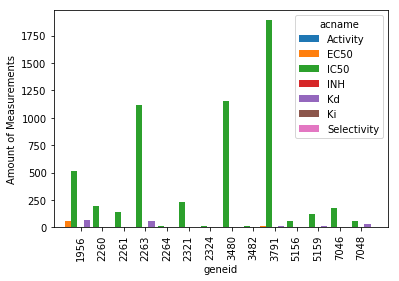

In [19]:
# Graphically examine the amount (.size) and type ('acname') of activity measurement for each 'geneid'
active_compounds_stats.plot(kind="bar", width=2);
plt.ylabel('Amount of Measurements');

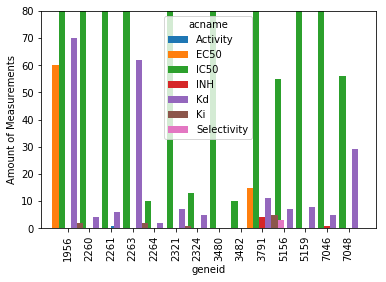

In [20]:
# As the IC50 values are overwhelmingly large, zoom into the lower region to look at the other activity measures ('acname').
active_compounds_stats.plot(kind="bar", width=2);
plt.ylim((0,80));
plt.ylabel('Amount of Measurements');

***

## 3. Tested Compounds as provided by PubChem BioAssay Submitters <a name="testedcompounds"></a>

These files were obtained on 8/6/2019 from an API provided by the PubChem Team: https://pubchem.ncbi.nlm.nih.gov/sdq/cgi2rcgi.cgi?infmt=json&outfmt=jsonp&query={"download":["geneid","cid","aid","acname","acvalue"],"collection":"bioactivity","where":{"ands":[{"geneid":"GENEID-GOES-HERE"},{"cid":"notnull"},{"acname":"notnull"},{"acvalue":"notnull"}]},"order":["relevancescore,desc"],"start":1,"limit":1000000}

This API is the same one mentioned above for the Active Compounds set, does *not* include the filter to limit to only {"activity":"active"} compounds, but does include the filters for preventing retrieval of rows with "NULL" values for 'cid', 'acname' or 'acvalue'. As mentioned above, since the point of this study is to identify a limited set of good-quality potential drug canditates, cleaning the data to promote it's utility is more important than completeness.

The same set of GeneIDs, as those mentioned above for various human growth factor receptors, facilitated retrieval of submitted PubChem BioAssay data - along with indications of the assay performed ('aid'), the activity-type ('acname') assessed and the activity-value measured in PubChem-standardized units of micromolar ('acvalue').

### Preparing the Tested Compound-specific DataFrame of Submitter-designated Assay Data for Various Growth Factor Receptor Targets <a name="preparingtested_compounddataframe"></a>

In [21]:
# Read in the resulting files produced by the PubChem APIs as described above
egfr_all = pd.read_csv('./All_Compounds/EGFR_1956.csv')
fgfr1_all = pd.read_csv('./All_Compounds/FGFR1_2260.csv')
fgfr2_all = pd.read_csv('./All_Compounds/FGFR2_2263.csv')
fgfr3_all = pd.read_csv('./All_Compounds/FGFR3_2261.csv')
fgfr4_all = pd.read_csv('./All_Compounds/FGFR4_2264.csv')
igf1r_all = pd.read_csv('./All_Compounds/IGF1R_3480.csv')
igf2r_all = pd.read_csv('./All_Compounds/IGF2R_3482.csv')
pdgfra_all = pd.read_csv('./All_Compounds/PDGFRA_5156.csv')
pdgfrb_all = pd.read_csv('./All_Compounds/PDGFRB_5159.csv')
tgfbr1_all = pd.read_csv('./All_Compounds/TGFBR1_7046.csv')
tgfbr2_all = pd.read_csv('./All_Compounds/TGFBR2_7048.csv')  
vegfr1_all = pd.read_csv('./All_Compounds/VEGFR1_FLT1_2321.csv')
vegfr2_all = pd.read_csv('./All_Compounds/VEGFR2_KDR_3791.csv')
vegfr3_all = pd.read_csv('./All_Compounds/VEGFR3_FLT4_2324.csv')                 

In [22]:
# A quick peak of the number of rows and columns for each file
print('egfr', egfr_all.shape)
print('fgfr1', fgfr1_all.shape)
print('fgfr2', fgfr2_all.shape)
print('fgfr3', fgfr3_all.shape)
print('fgfr4', fgfr4_all.shape)
print('igf1r', igf1r_all.shape)
print('igf2r', igf2r_all.shape)
print('pdgfra', pdgfra_all.shape)
print('pdgfrb', pdgfrb_all.shape)
print('tgfbr1', tgfbr1_all.shape)
print('tgfbr2', tgfbr2_all.shape)
print('vegfr1', vegfr1_all.shape)
print('vegfr2', vegfr2_all.shape)
print('vegfr3', vegfr3_all.shape)

egfr (919, 5)
fgfr1 (249, 5)
fgfr2 (1359, 5)
fgfr3 (206, 5)
fgfr4 (42, 5)
igf1r (1381, 5)
igf2r (12, 5)
pdgfra (82, 5)
pdgfrb (159, 5)
tgfbr1 (202, 5)
tgfbr2 (200, 5)
vegfr1 (322, 5)
vegfr2 (2199, 5)
vegfr3 (34, 5)


In [23]:
# Concatenating all Growth Factor Receptor data into a single "tested_compounds" DataFrame
frames = [egfr_all, fgfr1_all, fgfr2_all, fgfr3_all, fgfr4_all, igf1r_all, igf2r_all, pdgfra_all, pdgfrb_all, tgfbr1_all, tgfbr2_all, vegfr1_all, vegfr2_all, vegfr3_all]
tested_compounds = pd.concat((frames), axis=0, ignore_index=True, sort=False)

In [24]:
# Examine the concatenated "tested_compounds" DataFrame
print('The number of rows and columns of the tested_compounds dataframe:', tested_compounds.shape)
tested_compounds.head()
#tested_compounds = tested_compounds.to_csv('./All_Compounds/tested_compounds.csv')

The number of rows and columns of the tested_compounds dataframe: (7366, 5)


,geneid,cid,aid,acname,acvalue
0,1956,811665,634930,IC50,12.32
1,1956,889945,634930,IC50,5.72
2,1956,2983225,634930,IC50,38.43
3,1956,3724145,634930,IC50,5.11
4,1956,967629,634930,IC50,26.06


In [25]:
# Identify how many and what type of activity measurements ('acname') have been listed
# Note that ED50 is a typo (should be EC50), and that Kd(FGFR2) & Kd(TGFBR2) are really just Kd measurements. (The gene symbols are not needed as we have the corresponding geneids.)
tested_compounds.groupby('acname').count()

,geneid,cid,aid,acvalue
acname,,,,
Activity,1,1,1,1
Concentration,2,2,2,2
EC50,69,69,69,69
ED50,14,14,14,14
IC50,6532,6532,6532,6532
INH,5,5,5,5
Kd,697,697,697,697
Kd(FGFR2),13,13,13,13
Kd(TGFBR2),6,6,6,6


In [26]:
# Clean the data by replacing the ED50 typo with EC50, and converting Kd(FGFR2) & Kd(TGFBR2) with the more general Kd
tested_compounds['acname'] = tested_compounds['acname'].replace({'ED50':'EC50', 'Kd(FGFR2)':'Kd', 'Kd(TGFBR2)':'Kd'})

# Check the replacements by repeating the above grouping to see the set of activity measurements ('acname')
tested_compounds.groupby('acname').count()

,geneid,cid,aid,acvalue
acname,,,,
Activity,1,1,1,1
Concentration,2,2,2,2
EC50,83,83,83,83
IC50,6532,6532,6532,6532
INH,5,5,5,5
Kd,716,716,716,716
Ki,19,19,19,19
Km,5,5,5,5
Selectivity,3,3,3,3


In [27]:
# Create a matrix for the amount (.size) and type ('acname') of activity measurement for each 'geneid' 
tested_compounds_stats = tested_compounds.groupby(['geneid', 'acname']).size().unstack(level=1, fill_value=0)
tested_compounds_stats

acname,Activity,Concentration,EC50,IC50,INH,Kd,Ki,Km,Selectivity
geneid,,,,,,,,,
1956,0,0,68,622,0,227,2,0,0
2260,0,0,0,229,0,20,0,0,0
2261,0,0,0,166,0,40,0,0,0
2263,1,2,0,1208,0,137,11,0,0
2264,0,0,0,22,0,20,0,0,0
2321,0,0,0,300,0,21,1,0,0
2324,0,0,0,13,0,21,0,0,0
3480,0,0,0,1356,0,20,0,5,0
3482,0,0,0,12,0,0,0,0,0


NameError: name 'cmaps' is not defined

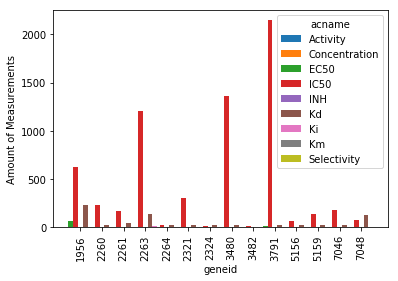

In [111]:
# Graphically examine the amount (.size) and type ('acname') of activity measurement for each 'geneid'
tested_compounds_stats.plot(kind="bar", width=2);
plt.ylabel('Amount of Measurements');


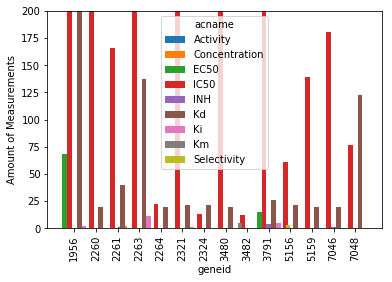

In [29]:
# As the IC50 values are overwhelmingly large, zoom into the lower region to look at the other activity measures ('acname').
tested_compounds_stats.plot(kind="bar", width=2);
plt.ylim((0,200));
plt.ylabel('Amount of Measurements');

In [30]:
# Since most of the data is based on measurements of IC50 and Kd, select only those rows for the next step.
ic50Kd_active = active_compounds[active_compounds['acname'].str.contains('IC50', 'Kd')]
ic50Kd_tested = tested_compounds[tested_compounds['acname'].str.contains('IC50', 'Kd')]

In [31]:
# Examine the number of rows & columns for the IC50 & Kd containing DataFrames
print('IC50/Kd Active data:', ic50Kd_active.shape)
print('All IC50/Kd data:',ic50Kd_tested.shape)

IC50/Kd Active data: (5684, 5)
All IC50/Kd data: (6532, 5)


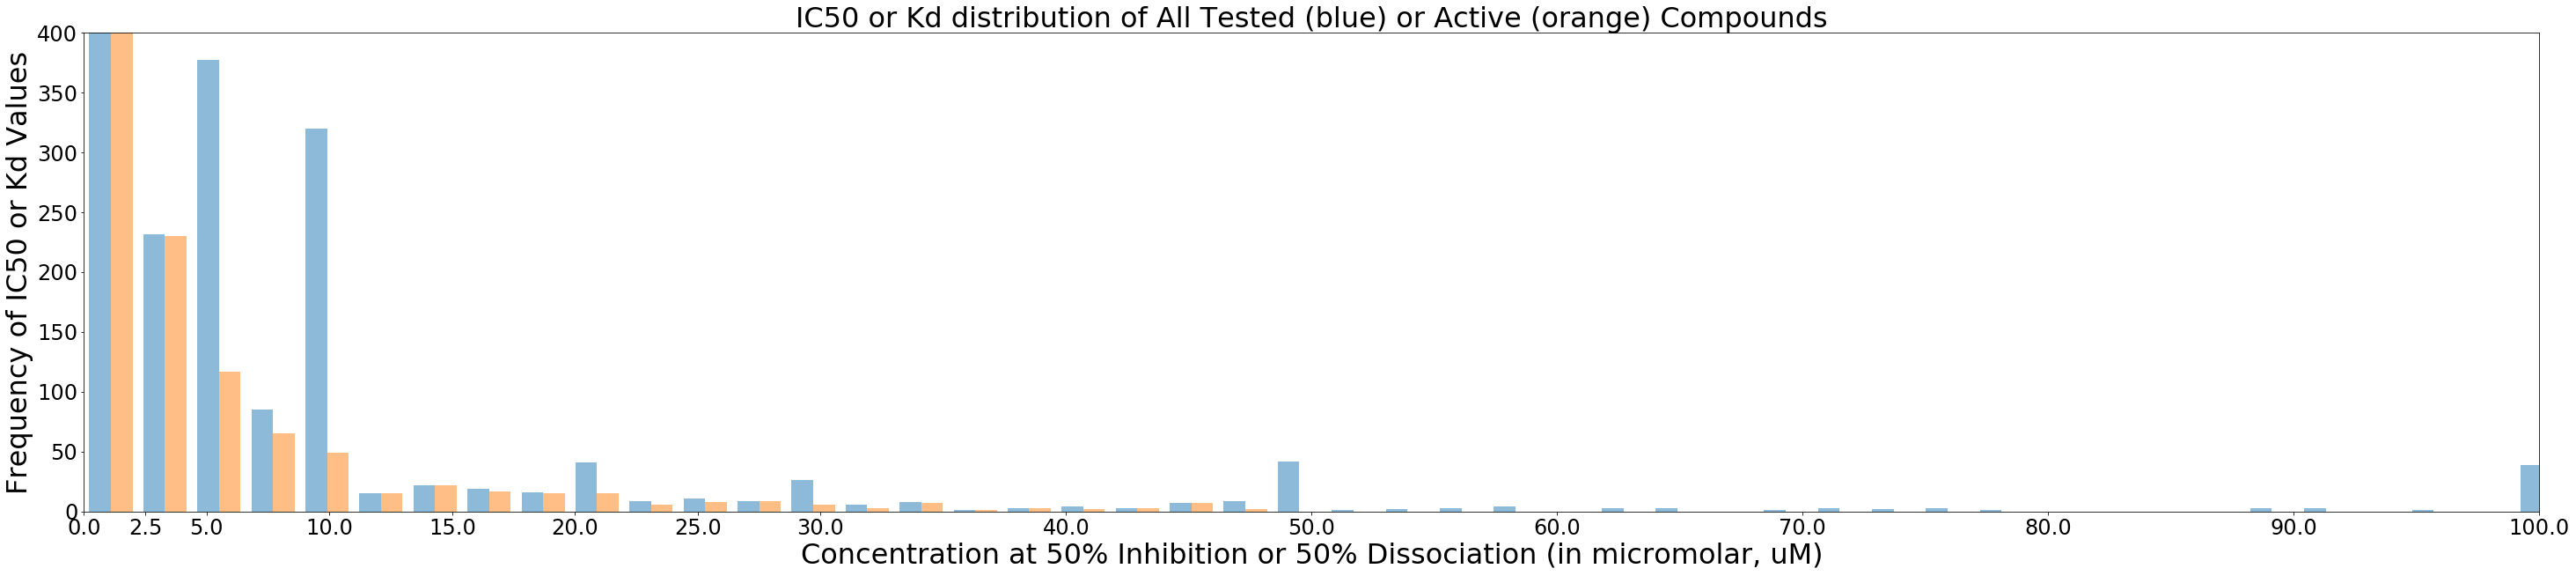

In [32]:
# Examine the distribution of IC50 and Kd Values measured for Tested Compounds against the geneid set.
x = ic50Kd_tested['acvalue']
y = ic50Kd_active['acvalue']

fig = plt.figure(figsize = (50,10));
plt.hist([x, y], bins=5000, alpha=0.5);
plt.xlim(0,100);
plt.ylim(0,400);
plt.ylabel('Frequency of IC50 or Kd Values', fontsize=32);
plt.xlabel('Concentration at 50% Inhibition or 50% Dissociation (in micromolar, uM)', fontsize=32);
plt.xticks([0,2.5,5,10,15,20,25,30,40,50,60,70,80,90,100], size = 24);
plt.yticks(size = 24);
plt.title('IC50 or Kd distribution of All Tested (blue) or Active (orange) Compounds', fontsize=32);

***

## 4. Adding BioAssay data to DrugBank Drug Compounds <a name="drugswithassaydata"></a>

To compare what is known for compounds designated as targeted drugs versus the larger set of compound for which biological activity assay data exists (potential drug candidates), it is necessary to add relevant assay data including activity measurements to the all_drug dataframe described above.

In order to do this, inner joins are performed with the all_drug dataframe and either the active_compounds or all_compounds dataframe based on common 'cid' column data. This will create an all_drug with added "designated active" compound data and one with added "all tested" compound data. I anticipate there will be more information in the "all tested" dataframe, but perhaps not significantly more - since these should all be active, since they've been accepted and designated as drugs.

### Preparing the Drug-plus-assay-data-specific DataFrame for Various Growth Factor Receptor Targets <a name="preparingdrug_assaydataframes"></a>

In [118]:
# Perform inner left join merging based on identical 'cid' values to add active assay data for the 'geneid'
all_drugs_plus_activeassay = pd.merge(all_drugs, active_compounds, on='cid', how='left')

# Perform inner left join merging based on identical 'cid' values to add all assay data for the 'geneid'
all_drugs_plus_testedassay = pd.merge(all_drugs, tested_compounds, on='cid', how='left')

# Examine information about the files to make sure the data has been added
print('all_drugs before the added assay data:', all_drugs.shape)
print('all_drugs_plus with added active assay data:', all_drugs_plus_activeassay.shape)
print('all_drugs_plus with added all assay data:', all_drugs_plus_testedassay.shape)
save = all_drugs_plus_testedassay.groupby('geneid_x').count()
save.to_csv('../save.csv')

all_drugs before the added assay data: (134, 4)
all_drugs_plus with added active assay data: (390, 8)
all_drugs_plus with added all assay data: (475, 8)


In [119]:
# The assay data may NOT be for the actual geneid that is designated as a drug...
# the cid may have add data for any of the other geneids in the bulk file.
# So, I'll need to delete rows where geneid_x does not equal geneid_y.
# But since the project deadline is coming up....I'll do this manually....
# 

# Save the files, then open them up in Excel and clean them by removing any geneid_x (drug target) & geneid_y (assay target) rows that are different
all_drugs_plus_activeassay = all_drugs_plus_activeassay.to_csv('./Drugs/all_drugs_plus_activeassay.csv')
all_drugs_plus_testedassay = all_drugs_plus_testedassay.to_csv('./Drugs/all_drugs_plus_testedassay.csv')
all_drugs_plus_testedassay.to_csv('../save2.csv')

# Upload the manually (man)-cleaned version of the above files
man_all_drugs_plus_testedassay = pd.read_csv('./Drugs/man_all_drugs_plus_testedassay.csv')
man_all_drugs_plus_activeassay = pd.read_csv('./Drugs/man_all_drugs_plus_activeassay.csv')
man_all_drugs_plus_testedassay.groupby('geneid').count()

AttributeError: 'NoneType' object has no attribute 'to_csv'

In [35]:
# Identify how many and what type of activity measurements ('acname') have been listed for the drug_plus_allassay dataframe
man_all_drugs_plus_testedassay.groupby('acname').count()

,geneid,cid,druggroup,drugaction,aid,acvalue
acname,,,,,,
EC50,1,1,1,0,1,1
IC50,84,84,84,54,84,84
INH,2,2,2,1,2,2
Kd,1,1,1,0,1,1
Selectivity,1,1,1,0,1,1


In [36]:
# Identify how many and what type of activity measurements ('acname') have been listed for the drug_plus_activeassay dataframe
man_all_drugs_plus_activeassay.groupby('acname').count()

,geneid,cid,druggroup,drugaction,aid,acvalue
acname,,,,,,
EC50,1,1,1,0,1,1
IC50,54,54,54,24,54,54
INH,2,2,2,1,2,2
Selectivity,1,1,1,0,1,1


In [115]:
# Since most of the data is based on measurements of IC50 and Kd, select only those rows for the next step.
ic50Kd_activedrugs = man_all_drugs_plus_activeassay[man_all_drugs_plus_activeassay['acname'].str.contains('IC50', 'Kd', na=False)]
ic50Kd_testeddrugs = man_all_drugs_plus_testedassay[man_all_drugs_plus_testedassay['acname'].str.contains('IC50', 'Kd', na=False)]
ic50Kd_testeddrugs.groupby('geneid').count()

,cid,druggroup,drugaction,aid,acname,acvalue
geneid,,,,,,
1956,37,37,37,37,37,37
2263,1,1,1,1,1,1
2321,3,3,0,3,3,3
3482,1,1,0,1,1,1
3791,40,40,16,40,40,40
7046,2,2,0,2,2,2


In [38]:
# Examine the number of rows & columns for the IC50 & Kd containing DataFrames
print('IC50/Kd Active data:', ic50Kd_activedrugs.shape)
print('All IC50/Kd data:',ic50Kd_testeddrugs.shape)


IC50/Kd Active data: (54, 7)
All IC50/Kd data: (84, 7)


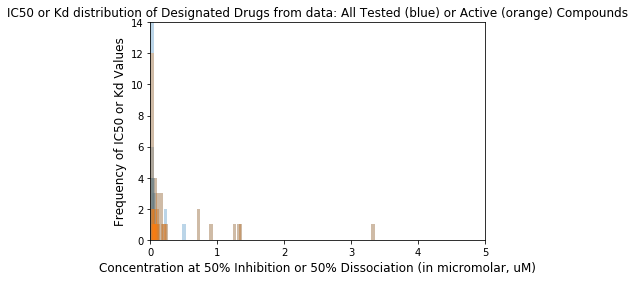

In [39]:
# Examine the distribution of IC50 and Kd Values measured for Drug Compounds with Assay data against the geneid set.
x = ic50Kd_testeddrugs['acvalue']
y = ic50Kd_activedrugs['acvalue']

#fig = plt.figure(figsize = (25,10));
plt.hist([x, y], bins=5000, alpha=0.3, width=0.05);
plt.xlim(0,5);
plt.ylim(0,14);
plt.ylabel('Frequency of IC50 or Kd Values', fontsize=12);
plt.xlabel('Concentration at 50% Inhibition or 50% Dissociation (in micromolar, uM)', fontsize=12);
#plt.xticks(size = 24);
#plt.yticks(size = 24);
plt.title('IC50 or Kd distribution of Designated Drugs from data: All Tested (blue) or Active (orange) Compounds', fontsize=12);

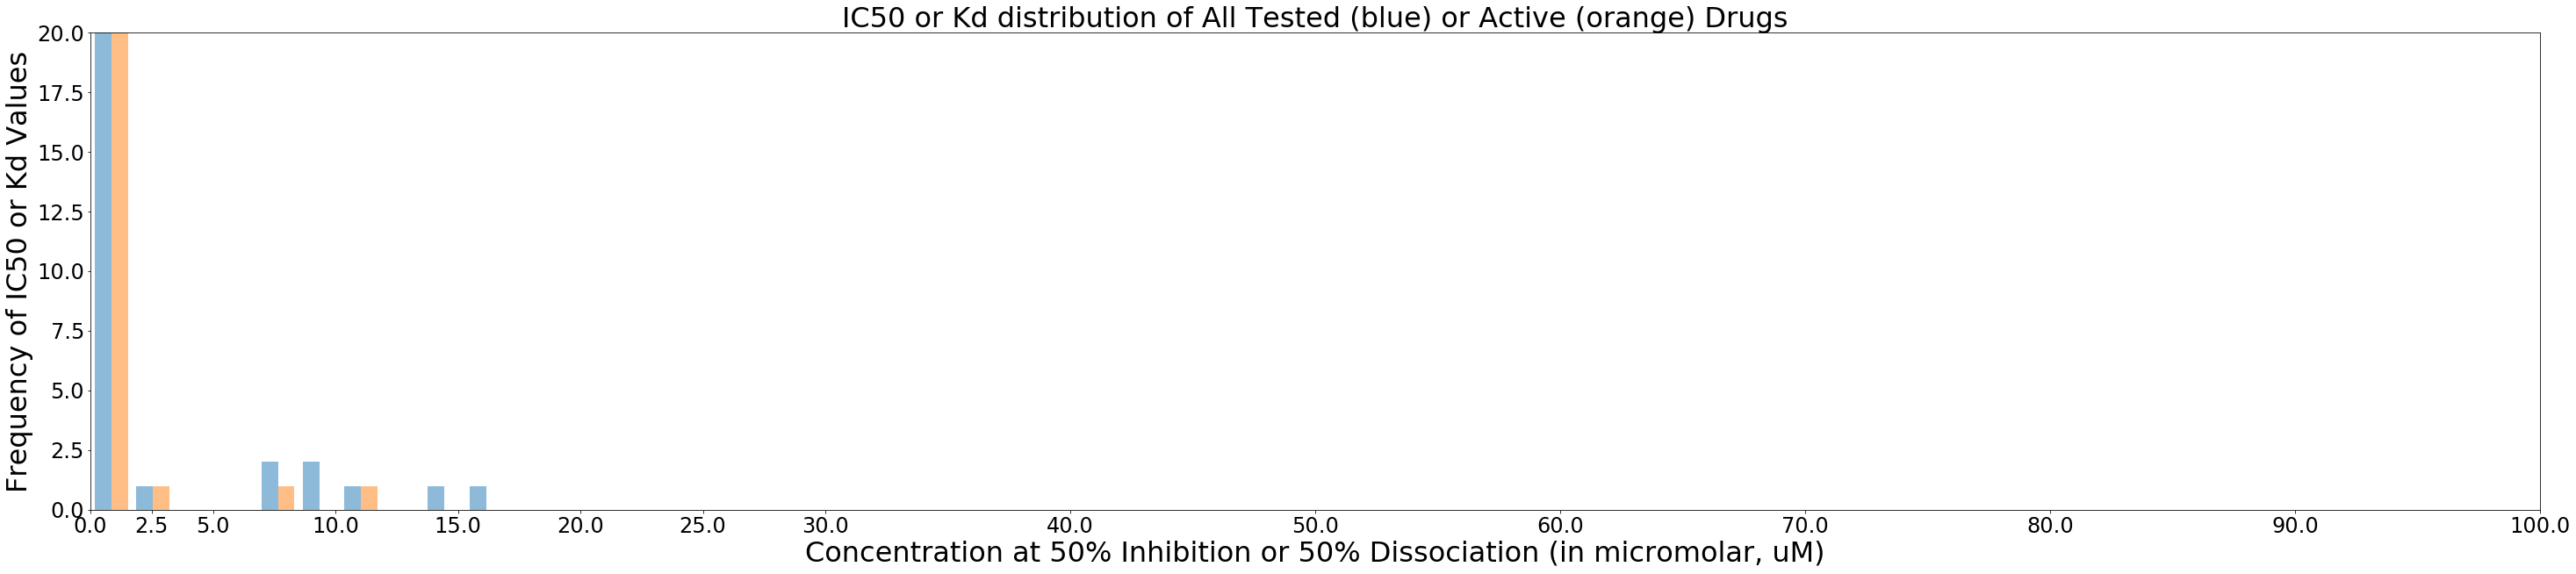

In [109]:
# Examine the distribution of IC50 and Kd Values measured for Tested Compounds against the geneid set.
x = ic50Kd_testeddrugs['acvalue']
y = ic50Kd_activedrugs['acvalue']

fig = plt.figure(figsize = (50,10));
plt.hist([x, y], bins=10, alpha=0.5);
plt.xlim(0,100);
plt.ylim(0,20);
plt.ylabel('Frequency of IC50 or Kd Values', fontsize=32);
plt.xlabel('Concentration at 50% Inhibition or 50% Dissociation (in micromolar, uM)', fontsize=32);
plt.xticks([0,2.5,5,10,15,20,25,30,40,50,60,70,80,90,100], size = 24);
plt.yticks(size = 24);
plt.title('IC50 or Kd distribution of All Tested (blue) or Active (orange) Drugs', fontsize=32);

***

## 5. Assessment & Summary of Gene/Gene Product and Compound Data <a name="summary"></a>

This is a small pilot study using data science techniques to discover chemicals that have potential impact on the function of a set of Human Growth Factor Receptors. These genes/gene products are often overactive (either due to increased expression or function) in various cancers, thus are a good target for gene-specific drug discover or design in the hope of finding a new, effective cancer chemotherapeutic.

### Human genes/gene products included in this study <a name="genes"></a>

In [40]:
genes = pd.read_csv('./gene_summary.csv', usecols=[0,1])
pd.set_option('display.max_colwidth', -1)
genes

,geneid,human gene symbol - name
0,1956,EGFR - epidermal growth factor receptor
1,2260,FGFR1 - fibroblast growth factor receptor 1
2,2263,FGFR2 - fibroblast growth factor receptor 2
3,2261,FGFR3 - fibroblast growth factor receptor 3
4,2264,FGFR4 - fibroblast growth factor receptor 4
5,3480,IGF1R - insulin like growth factor 1 receptor
6,3482,IGF2R - insulin like growth factor 2 receptor
7,5156,PDGFRA - platelet derived growth factor receptor alpha
8,5159,PDGFRB - platelet derived growth factor receptor beta
9,7046,TGFBR1 - transforming growth factor beta receptor 1


### DataFrames created for this study <a name="dataframes"></a>

- Tested: the total amount of compounds tested for activity against the genes/gene products
- Active: the amount of compounds that were designated as active against the genes/gene products
- Tested Drugs: the amount of drugs for which assay data exists
- Active Drugs: the amount of drugs for which designated as "active" assay data exists 

In [41]:
print('The number of rows & columns for the following dataframes are:\n')
print('Tested Compounds:', tested_compounds.shape)
print('Active Compounds:', active_compounds.shape)
print('Drug+Tested Data:', man_all_drugs_plus_testedassay.shape)
print('Drug+Active Data:', man_all_drugs_plus_activeassay.shape)

The number of rows & columns for the following dataframes are:

Tested Compounds: (7366, 5)
Active Compounds: (5994, 5)
Drug+Tested Data: (169, 7)
Drug+Active Data: (128, 7)


### Genes & Compounds <a name="genes_compounds"></a>

First, we'll identify the number of compounds ('cid') that have been tested (with some designated as "active") for activity against each gene/gene product ('geneid'). Keep in mind that these only include compounds for which there are measurements in both the activity type ('acname') and value ('acvalue') columns. 
Then, we'll repeat this process but only for those that happen to have the activity types ('acname') IC50 or Kd - which are by far the most represented types in this dataset.

#### Here are counts of chemical compounds that have been tested or designated as active against the target gene/gene products.

In [42]:
# Generate counts of data based on 'geneid's.
tested_counts = tested_compounds.groupby('geneid').count()
active_counts = active_compounds.groupby('geneid').count()
tested_drug_counts = man_all_drugs_plus_testedassay.groupby('geneid').count()
active_drug_counts = man_all_drugs_plus_activeassay.groupby('geneid').count()

In [43]:
# Create a new dataframe with 'cid' columns containing counts of compounds for each of the above tables
cid_counts = pd.concat([tested_counts['cid'], active_counts['cid'], tested_drug_counts['cid'], active_drug_counts['cid']], axis=1)
# Rename the columns to match the originating dataframes
cid_counts.columns = ['tested compounds', 'active compounds', 'tested_drugs', 'active_drugs']
# Show the data!
print('This table lists the count of all compounds tested or active, respectively, for these genes/gene products.')
cid_counts

This table lists the count of all compounds tested or active, respectively, for these genes/gene products.


,tested compounds,active compounds,tested_drugs,active_drugs
geneid,,,,
1956,919,642,46,8
2260,249,198,8,8
2261,206,149,4,4
2263,1359,1177,10,10
2264,42,12,2,2
2321,322,243,10,10
2324,34,18,5,5
3480,1381,1155,4,4
3482,12,10,1,1


#### Now, a count of just those chemical compounds for which we have IC50 or Kd data (for value comparison).

In [44]:
# Filter the data that has measurements of IC50 and Kd.
ic50Kd_tested_compounds = tested_compounds[tested_compounds['acname'].str.contains('IC50', 'Kd', na=False)]
ic50Kd_active_compounds = active_compounds[active_compounds['acname'].str.contains('IC50', 'Kd', na=False)]
ic50Kd_tested_drugs = man_all_drugs_plus_testedassay[man_all_drugs_plus_testedassay['acname'].str.contains('IC50', 'Kd', na=False)]
ic50Kd_active_drugs = man_all_drugs_plus_activeassay[man_all_drugs_plus_activeassay['acname'].str.contains('IC50', 'Kd', na=False)]

In [45]:
# Generate counts of data with IC50 or Kd data based on 'geneid's.
ic50Kd_tested_counts = ic50Kd_tested_compounds.groupby('geneid').count()
ic50Kd_active_counts = ic50Kd_active_compounds.groupby('geneid').count()
ic50Kd_tested_drug_counts = ic50Kd_tested_drugs.groupby('geneid').count()
ic50Kd_active_drug_counts = ic50Kd_active_drugs.groupby('geneid').count()

In [46]:
# Create a new dataframe with 'cid' columns containing counts of compounds with IC50 or Kd data for each of the above tables
ic50Kd_cid_counts = pd.concat([ic50Kd_tested_counts['cid'], ic50Kd_active_counts['cid'], ic50Kd_tested_drug_counts['cid'], ic50Kd_active_drug_counts['cid']], axis=1)
# Rename the columns to match the originating dataframes
ic50Kd_cid_counts.columns = ['tested compounds', 'active compounds', 'tested_drugs', 'active_drugs']
# Show the data!
print('This table lists the count of all compounds with IC50 or Kd data that were tested or active, respectively, for these genes/gene products.')
ic50Kd_cid_counts

This table lists the count of all compounds with IC50 or Kd data that were tested or active, respectively, for these genes/gene products.


,tested compounds,active compounds,tested_drugs,active_drugs
geneid,,,,
1956,622,510,37.0,7.0
2260,229,194,NaN,NaN
2261,166,143,NaN,NaN
2263,1208,1112,1.0,1.0
2264,22,10,NaN,NaN
2321,300,235,3.0,3.0
2324,13,13,NaN,NaN
3480,1356,1155,NaN,NaN
3482,12,10,1.0,1.0


### Assessment for identification of good lead compounds <a name="candidates"></a>

#### Assessing the compounds for strong activity or affinity for the gene/gene products <a name="assessing"></a>
With comparable data, I can now filter the datasets to identify only those compounds with IC50 or Kd values that indicate a strong effect on the gene/gene product. While there are no specific rules for this threshold, indeed virtually every gene/gene product has it's own value, I will begin by filtering the data keeping compounds that have an IC50 or Kd of less than 10nM (0.01uM).

In [47]:
# Filter the data to include only compounds that have an IC50 or Kd value ('acvalue') of <0.01 (10nM).
good_tested_compounds = ic50Kd_tested_compounds[ic50Kd_tested_compounds['acvalue']<0.01]
good_active_compounds = ic50Kd_active_compounds[ic50Kd_active_compounds['acvalue']<0.01]
good_tested_drugs = ic50Kd_tested_drugs[ic50Kd_tested_drugs['acvalue']<0.01]
good_active_drugs = ic50Kd_active_drugs[ic50Kd_active_drugs['acvalue']<0.01]

In [48]:
ic50Kd_tested_compounds[(ic50Kd_tested_compounds.geneid == 3482)]

,geneid,cid,aid,acname,acvalue
4156,3482,135524445,102609,IC50,3.20
4157,3482,135410197,102609,IC50,77.10
4158,3482,10070969,102609,IC50,46.50
4159,3482,439427,318562,IC50,10.00
4160,3482,49797399,318562,IC50,5.03
4161,3482,447096,318562,IC50,11.50
4162,3482,49797397,318562,IC50,3.70
4163,3482,49797398,318562,IC50,4.44
4164,3482,49797400,318562,IC50,4.76
4165,3482,44449242,318562,IC50,20.00


In [49]:
# Generate counts of good IC50 or Kd data (<10nM) by 'geneid's.
good_tested_counts = good_tested_compounds.groupby('geneid').count()
good_active_counts = good_active_compounds.groupby('geneid').count()
good_tested_drug_counts = good_tested_drugs.groupby('geneid').count()
good_active_drug_counts = good_active_drugs.groupby('geneid').count()

In [50]:
# Create a new dataframe with 'cid' columns containing counts of compounds with good IC50 or Kd data (<10nM) for each of the above tables
good_cid_counts = pd.concat([good_tested_counts['cid'], good_active_counts['cid'], good_tested_drug_counts['cid'], good_active_drug_counts['cid']], axis=1)
# Rename the columns to match the originating dataframes
good_cid_counts.columns = ['tested compounds', 'active compounds', 'tested_drugs', 'active_drugs']
# Show the data!
print('This table lists a preliminary view of the count of compounds with good IC50 or Kd data (<10nM) for these genes/gene products.\n')
print("Please note that geneids 2324 & 3482 have no compounds with 'acvalues' better than 10nM.\nThis will be adjusted in the next steps to include some data for these 'geneids'.")
good_cid_counts

This table lists a preliminary view of the count of compounds with good IC50 or Kd data (<10nM) for these genes/gene products.

Please note that geneids 2324 & 3482 have no compounds with 'acvalues' better than 10nM.
This will be adjusted in the next steps to include some data for these 'geneids'.


,tested compounds,active compounds,tested_drugs,active_drugs
geneid,,,,
1956,69,69,10.0,2.0
2260,76,76,NaN,NaN
2261,53,53,NaN,NaN
2263,546,546,1.0,1.0
2264,1,1,NaN,NaN
2321,31,31,NaN,NaN
3480,8,8,NaN,NaN
3791,348,348,12.0,12.0
5156,14,14,NaN,NaN


#### Creation of lists of lead compounds for each gene/gene target <a name="possibledrugcandidates"></a>
Since I'm still learning how to do this somewhat manually, I'll retrieve a "manageable" list of 8-16 potential lead compounds ('cids') per gene/gene product ('geneid').
These will be created by adjusting the threshold 'acvalue' to for each geneid.

Note: In this section, I've made sure to filter out all chemical compounds that are also designated as drugs by DrugBank and I've also checked to make sure that they are also not indexed by NLM's DailyMed (on: https://www.ncbi.nlm.nih.gov/pccompound, searched for tested_cids AND "has dailymed"[Filter] and found none as a result).

In [51]:
# This set had manageable numbers of good-quality cids (8, 12 & 14, respectively) at 10nM threshold for 'acvalue'.
geneid3480_cids = good_active_compounds.loc[good_active_compounds['geneid']==3480]
geneid3480_cids = geneid3480_cids.cid
print('geneid3480 has', geneid3480_cids.count(), 'lead compounds with IC50 or Kd values below 10nM')

geneid5159_cids = good_active_compounds.loc[good_active_compounds['geneid']==5159]
geneid5159_cids = geneid5159_cids.cid
print('geneid5159 has', geneid5159_cids.count(), 'lead compounds with IC50 or Kd values below 10nM')

geneid5156_cids = good_active_compounds.loc[good_active_compounds['geneid']==5156]
geneid5156_cids = geneid5156_cids.cid
print('geneid5156 has', geneid5156_cids.count(), 'lead compounds with IC50 or Kd values below 10nM')

geneid3480 has 8 lead compounds with IC50 or Kd values below 10nM
geneid5159 has 12 lead compounds with IC50 or Kd values below 10nM
geneid5156 has 14 lead compounds with IC50 or Kd values below 10nM


In [52]:
# For geneids with 1-3, increase the threshold of 'acvalue' to gain more possible 'cids' to examine.

#ic50Kd_active_compounds[(ic50Kd_active_compounds.geneid == 2264)]
geneid2264_cids = ic50Kd_active_compounds[(ic50Kd_active_compounds.acvalue<2) & (ic50Kd_active_compounds.geneid == 2264)]
geneid2264_cids = geneid2264_cids.cid
print('geneid2264 has', geneid2264_cids.count(), 'lead compounds with IC50 or Kd values below 2,000nM or 2uM')

#ic50Kd_active_compounds[(ic50Kd_active_compounds.geneid == 7048)]
geneid7048_cids = ic50Kd_active_compounds[(ic50Kd_active_compounds.acvalue<0.4) & (ic50Kd_active_compounds.geneid == 7048)]
geneid7048_cids = geneid7048_cids.cid
print('geneid7048 has', geneid7048_cids.count(), 'lead compounds with IC50 or Kd values below 400nM')

#ic50Kd_active_compounds[(ic50Kd_active_compounds.geneid == 7046)]
geneid7046_cids = ic50Kd_active_compounds[(ic50Kd_active_compounds.acvalue<0.02) & (ic50Kd_active_compounds.geneid == 7046)]
geneid7046_cids = geneid7046_cids.cid
print('geneid7046 has', geneid7046_cids.count(), 'lead compounds with IC50 or Kd values below 20nM')

geneid2264 has 8 lead compounds with IC50 or Kd values below 2,000nM or 2uM
geneid7048 has 14 lead compounds with IC50 or Kd values below 400nM
geneid7046 has 10 lead compounds with IC50 or Kd values below 20nM


In [53]:
# For the two 'geneids' with no IC50 or Kd values below 10nM, increase the threshold of 'acvalue' to gain some possible 'cids' to examine.

#ic50Kd_active_compounds[(ic50Kd_active_compounds.geneid == 2324)]
geneid2324_cids = ic50Kd_active_compounds[(ic50Kd_active_compounds.acvalue<0.16) & (ic50Kd_active_compounds.geneid == 2324)]
geneid2324_cids = geneid2324_cids.cid
print('geneid2324 has', geneid2324_cids.count(), 'lead compounds with IC50 or Kd values below 160nM or 0.16uM')

#ic50Kd_tested_compounds[(ic50Kd_tested_compounds.geneid == 3482)]
geneid3482_cids = ic50Kd_active_compounds[(ic50Kd_active_compounds.acvalue<6) & (ic50Kd_active_compounds.geneid == 3482)]
geneid3482_cids = geneid3482_cids.cid
print('geneid3482 has', geneid3482_cids.count(), 'lead compounds with IC50 or Kd values below 6,000nM or 6uM')

geneid2324 has 11 lead compounds with IC50 or Kd values below 160nM or 0.16uM
geneid3482 has 7 lead compounds with IC50 or Kd values below 6,000nM or 6uM


In [54]:
# For geneids with a fairly large number of active drug 'cids', decrease threshold for 'acvalue' to have a manageable amount of possible 'cids' to examine.

#ic50Kd_active_compounds[(ic50Kd_active_compounds.geneid == 2321)]
geneid2321_cids = ic50Kd_active_compounds[(ic50Kd_active_compounds.acvalue<0.006) & (ic50Kd_active_compounds.geneid == 2321)]
geneid2321_cids = geneid2321_cids.cid
print('geneid2321 has', geneid2321_cids.count(), 'lead compounds with IC50 or Kd values below 6nM')

#ic50Kd_active_compounds[(ic50Kd_active_compounds.geneid == 2261)]
geneid2261_cids = ic50Kd_active_compounds[(ic50Kd_active_compounds.acvalue<0.003) & (ic50Kd_active_compounds.geneid == 2261)]
geneid2261_cids = geneid2261_cids.cid
print('geneid2261 has', geneid2261_cids.count(), 'lead compounds with IC50 or Kd values below 3nM')

#ic50Kd_active_compounds[(ic50Kd_active_compounds.geneid == 2260)]
geneid2260_cids = ic50Kd_active_compounds[(ic50Kd_active_compounds.acvalue<0.0015) & (ic50Kd_active_compounds.geneid == 2260)]
geneid2260_cids = geneid2260_cids.cid
print('geneid2260 has', geneid2260_cids.count(), 'lead compounds with IC50 or Kd values below 1.5nM')

geneid2321 has 16 lead compounds with IC50 or Kd values below 6nM
geneid2261 has 15 lead compounds with IC50 or Kd values below 3nM
geneid2260 has 16 lead compounds with IC50 or Kd values below 1.5nM


In [55]:
# For geneids with a large number of active drug 'cids' and indications that some of these may be designated as drugs,
# remove 'cids' that occur in the all_drugs DataFrame and then decrease threshold for 'acvalue' to have a manageable amount of possible 'cids' to examine.

# Removal of drug 'cids' from geneid 1956 and decrease of 'acvalue' filter to gain a manageable amount of possible 'cids' to examine.
geneid1956_actives = ic50Kd_active_compounds[(ic50Kd_active_compounds.geneid == 1956)]
merged = geneid1956_actives.merge(all_drugs, on='cid', how='left', indicator=True)
geneid1956_actives_nodrugs = merged[merged['_merge']=='left_only']
geneid1956_actives_nodrugs.drop(['geneid_y', 'druggroup', 'drugaction', '_merge'], axis=1, inplace=True)
print('number of geneid1956 active cids removed due to removal of designated drugs:', (len(geneid1956_actives.index) - len(geneid1956_actives_nodrugs.index)))

geneid1956_cids = geneid1956_actives_nodrugs[(geneid1956_actives_nodrugs.acvalue<0.003) & (geneid1956_actives_nodrugs.geneid_x == 1956)]
geneid1956_cids = geneid1956_cids.cid
print('geneid1956 has', geneid1956_cids.count(), 'lead compounds with IC50 or Kd values below 3nM\n')

# Removal of drug 'cids' from geneid 3791 and decrease of 'acvalue' filter to gain a manageable amount of possible 'cids' to examine.
geneid3791_actives = ic50Kd_active_compounds[(ic50Kd_active_compounds.geneid == 3791)]
merged = geneid3791_actives.merge(all_drugs, on='cid', how='left', indicator=True)
geneid3791_actives_nodrugs = merged[merged['_merge']=='left_only']
geneid3791_actives_nodrugs.drop(['geneid_y', 'druggroup', 'drugaction', '_merge'], axis=1, inplace=True)
print('number of geneid3791 active cids removed due to removal of designated drugs:', (len(geneid3791_actives.index) - len(geneid3791_actives_nodrugs.index)))

geneid3791_cids = geneid3791_actives_nodrugs[(geneid3791_actives_nodrugs.acvalue<0.00045) & (geneid3791_actives_nodrugs.geneid_x == 3791)]
geneid3791_cids = geneid3791_cids.cid
print('geneid3791 has', geneid3791_cids.count(), 'lead compounds with IC50 or Kd values below 0.45nM\n')

# Removal of drug 'cids' from geneid 2263 and decrease of 'acvalue' filter to gain a manageable amount of possible 'cids' to examine.
geneid2263_actives = ic50Kd_active_compounds[(ic50Kd_active_compounds.geneid == 2263)]
merged = geneid2263_actives.merge(all_drugs, on='cid', how='left', indicator=True)
geneid2263_actives_nodrugs = merged[merged['_merge']=='left_only']
geneid2263_actives_nodrugs.drop(['geneid_y', 'druggroup', 'drugaction', '_merge'], axis=1, inplace=True)
print('number of geneid2263 active cids removed due to removal of designated drugs:', (len(geneid2263_actives.index) - len(geneid2263_actives_nodrugs.index)))

geneid2263_cids = geneid2263_actives_nodrugs[(geneid2263_actives_nodrugs.acvalue<0.00045) & (geneid2263_actives_nodrugs.geneid_x == 2263)]
geneid2263_cids = geneid2263_cids.cid
print('geneid2263 has', geneid2263_cids.count(), 'lead compounds with IC50 or Kd values below 0.45nM')

C:\Program Files\Anaconda\lib\site-packages\pandas\core\frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


number of geneid1956 active cids removed due to removal of designated drugs: 38
geneid1956 has 16 lead compounds with IC50 or Kd values below 3nM

number of geneid3791 active cids removed due to removal of designated drugs: 55
geneid3791 has 16 lead compounds with IC50 or Kd values below 0.45nM

number of geneid2263 active cids removed due to removal of designated drugs: 2
geneid2263 has 14 lead compounds with IC50 or Kd values below 0.45nM


### Summary Table <a name="summary_leadcompounds"></a>

Here's a recap of the 'geneids' and their corresponding gene symbols & names along with data from the original 96,000,000 chemical compounds in the PubChem Compound database (https://www.ncbi.nlm.nih.gov/pccompound/) which were gathered or produced by this project:
- PubChem Compounds ('cid' values) reported as having been assayed against the particular gene/gene product.
- PubChem Compounds ('cid' values) filtered that have full activity designation ('activity'), measurement type ('acname') and, measurements ('acvalue').
- PubChem Compounds ('cid' values) filtered that have reported IC50 or Kd values of less than 10nM - a very good general measure of strong interaction.
- PubChem Compounds ('cid' values) that have been filtered for strong interaction, with 'acvalue' measurements adjusted to gather a small, manageable set of very good interacting chemicals (lead compounds)....
-...the IC50 or Kd thresholds ('acvalue') mentioned above to produce the small set of lead compounds.

In [56]:
gene_summary = pd.read_csv('./gene_summary.csv', usecols=['geneid','human gene symbol - name','number of assertions/measurements reported','number of tested compounds with activity designation and kinetic data', 'number of tested compounds w/ IC50 or Kd <0.01 uM','number of lead compounds','IC50 or Kd threshold (uM)'], index_col=False)
gene_summary

,geneid,human gene symbol - name,number of assertions/measurements reported,number of tested compounds with activity designation and kinetic data,number of tested compounds w/ IC50 or Kd <0.01 uM,number of lead compounds,IC50 or Kd threshold (uM)
0,1956,EGFR - epidermal growth factor receptor,23503,919,69,16,0.00300
1,2260,FGFR1 - fibroblast growth factor receptor 1,7557,249,76,16,0.00150
2,2263,FGFR2 - fibroblast growth factor receptor 2,2960,1359,546,16,0.00045
3,2261,FGFR3 - fibroblast growth factor receptor 3,5890,206,53,15,0.00300
4,2264,FGFR4 - fibroblast growth factor receptor 4,2560,42,1,11,2.00000
5,3480,IGF1R - insulin like growth factor 1 receptor,8334,1381,8,8,0.01000
6,3482,IGF2R - insulin like growth factor 2 receptor,20,12,0,7,6.00000
7,5156,PDGFRA - platelet derived growth factor receptor alpha,5314,82,14,14,0.01000
8,5159,PDGFRB - platelet derived growth factor receptor beta,4595,159,12,12,0.01000
9,7046,TGFBR1 - transforming growth factor beta receptor 1,2533,202,3,10,0.02000


***

## 6. Spot Check!  <a name="spotcheck"></a>
Using the good_active_compounds file, I randomly selected 'cid' from the top of the list and a 'cid' from the bottom of the list.
- **cid:123631** appeared to have a good IC50 value (1.0nM) for **geneid:1956 (EGFR)**.
- **cid:9811611** appeared to have a good IC50 value (1.3nM) for **geneid:3791 (VEGFR2)**.

I searched each in the PubChem Compound database to look for any indication of known activity against each's target gene/gene product.
- https://pubchem.ncbi.nlm.nih.gov/compound/123631
- https://pubchem.ncbi.nlm.nih.gov/compound/9811611

In [57]:
good_active_compounds.head()

,geneid,cid,aid,acname,acvalue
6,1956,74766095,1289546,IC50,0.007000
31,1956,5328294,603958,IC50,0.009550
41,1956,5328293,603958,IC50,0.009772
100,1956,10297043,629471,IC50,0.002000
109,1956,123631,638084,IC50,0.001000


**Take a look at CID:123631 for GeneID:1956 (EGFR)** - with an IC50 value of 0.001000 (1nM, pretty darn good).

Name: Gefitinib

https://pubchem.ncbi.nlm.nih.gov/compound/123631 
- From the EU Community Register of Medicinal Products:
"IRESSA is indicated as monotherapy for the treatment of adult patients with locally advanced or metastatic non small cell lung cancer (NSCLC) with activating mutations of EGFR."
- From MeSH:  "A selective tyrosine kinase inhibitor for the EPIDERMAL GROWTH FACTOR RECEPTOR (EGFR) that is used for the treatment of locally advanced or metastatic NON-SMALL CELL LUNG CANCER."

**It works!**

In [58]:
good_active_compounds.tail()

,geneid,cid,aid,acname,acvalue
5941,3791,86290581,1344206,IC50,0.00600
5942,3791,86290583,1344206,IC50,0.00300
5944,3791,86290707,1344206,IC50,0.00700
5945,3791,86290751,1344206,IC50,0.00300
5963,3791,9811611,1344811,IC50,0.00127


**Take a look at CID:9811611 for GeneID:3791 (VEGFR2)** - with an IC50 value of 0.00127 (1.27nM, pretty darn good).

Name: 3-((4-Bromo-2,6-difluorobenzyl)oxy)-5-(3-(4-(pyrrolidin-1-yl)butyl)ureido)isothiazole-4-carboxamide

https://pubchem.ncbi.nlm.nih.gov/compound/9811611#section=ClinicalTrials-gov

In the "Clinical Trials" section, listed by ClinicalTrials.gov:
- A Clinical Efficacy Study Of An Oral Tyrosine Kinase Inhibitor Of VEGFR-2 Given In Combination With Chemotherapy
- Study Of An Oral Tyrosine Kinase Inhibitor Of VEGFR-2 To Treat Small-Volume Ovarian, Peritoneal, Fallopian Tube Cancer

From MeSH:  "inhibits vascular endothelial growth factor receptor-2 tyrosine kinase; structure in first source"

**It works!**

### *Now if only I can find something novel that isn't already indicated.....*

***

## 7. Find gene/gene product interactions for the lead compounds: assess the potential for side effects <a name="sideeffects"></a>
A major complication for any lead compound or drug candidate is the potential for off-target impact. The next thing to do will be to use the 'cid' to retrieve BioAssay data for each chemical and see what gene/gene product targets have been assayed along with kinetic data.  A filter will be applied to see if the 'cid' has any measured value below the threshold for the target gene/gene product.  If so, this might be a reason to eliminate this 'cid' in the list of potential lead compounds.

### Acquisition of the off-target biological activity data  <a name="offtargetdata"></a>
These files were obtained on 8/9/2019 from an API provided by the PubChem Team: https://pubchem.ncbi.nlm.nih.gov/sdq/sdqagent.cgi?infmt=json&outfmt=jsonp&query={"download":["cid","aid","activity","acname","acvalue", "geneid"],"collection":"bioactivity","where":{"ands":[{"cid":"CID-GOES-HERE"},{"geneid":"notnull"},{"acname":"notnull"},{"acvalue":"notnull"},{"activity":"notnull"}]},"order":["cid,asc"],"start":1,"limit":1000000,"nullatbottom":1}.

This API for assessing potential-lead compounds' impact on other gene targets, does not include the filter to limit to only {"activity":"active"} compounds in order to identify which genes/gene products have been assessed. However, it does include the filters for preventing retrieval of rows with "NULL" values for 'cid', 'acname' or 'acvalue'. Since the point of this study is to use data of qood quality this step promotes the use of quality kinetic data for the assessment. The retrieved data includes the 'cid', the "call from the submitter of the 'activity' (active, inactive or inconclusive), activity-type ('acname') assessed and the activity-value measured in PubChem-standardized units of micromolar ('acvalue') - along with the 'geneid' of the gene/gene product assayed.

Rather than repeating the API call/data retrieval loop in the following cell 14 times in this Jupyter notebook, I have provided a list of Lead compound dataframes that contain the 'cid' list needed for each "run".  I manually replaced the name of the list below in the API run and then ran the following cells which analyze the retrieved data.

Lead compound cid lists:
- geneid1956_cids
- geneid2260_cids
- geneid2261_cids
- geneid2263_cids
- geneid2264_cids
- geneid2321_cids
- geneid2324_cids
- geneid3482_cids
- geneid3480_cids
- geneid3791_cids
- geneid5156_cids
- geneid5159_cids
- geneid7046_cids
- geneid7048_cids

In [59]:
# Read in the chemical compound ('cids') to retrieve biological activity data against all tested gene/gene products ('geneids')
# Manually change the geneid number in the next line.  Run a cell below this one to rename the resulting cid_data DataFrame.
# Then go to the next one.   (I'm describing this here to save space.)
cids = geneid3791_cids
cid_concat = []

# Create a loop to retrieve data for each 'cid' or group of 'cids'
for cid in cids:
    
    # API URL call with the spot to put in the 'cid'
    cid_URL = 'https://pubchem.ncbi.nlm.nih.gov/sdq/sdqagent.cgi?infmt=json&outfmt=jsonp&query={"download":["cid","aid","activity","acname","acvalue", "geneid"],"collection":"bioactivity","where":{"ands":[{"cid":"' + str(cid) + '"},{"geneid":"notnull"},{"acname":"notnull"},{"acvalue":"notnull"},{"activity":"notnull"}]},"order":["cid,asc"],"start":1,"limit":1000000,"nullatbottom":1}'
    
    # Here's the offical request sent out to the server
    r = requests.get(cid_URL)
    #print(r) - this will provide a response cose (200) if it succeeded other number if it didn't
    
    # If the request succeeded (status code 200), then read the string in (ignoring the first line of jibberish).
    if r.status_code==200:

        # Ignore the first line of jibberish ([1:], then split each line (at \n) into separate dictionary sets.
        reader = csv.DictReader(r.text[1:].splitlines())
        # Concatenate the dictionary sets into a set
        cid_concat += list(reader)
        
    # Warn that there was an error for accessing a 'cid' dataset
    else:
        print(cid, 'produced an error')
        
    #convert the dictionary sets into a dataframe and call it cid_data.
    cid_data = pd.DataFrame.from_dict(cid_concat)

# Take a look at the concatenated file.
cid_data.head()

,cid,aid,activity,acname,acvalue,geneid
0,9893493,240497,Active,IC50,5.3,2064
1,9893493,240625,Unspecified,IC50,50,5578
2,9893493,240644,Active,IC50,5.1,3932
3,9893493,240673,Unspecified,IC50,50,1017
4,9893493,240919,Active,IC50,0.058,2260


### Identification of off-target genes potential impacted by lead compounds <a name="offtargetassessment"></a>
After each of the API call/data retrieval loops from the cell above, each of the following cells were run to analyze the data for information pertaining to any non-target geneids with "hot" values (off-target actives).  To prevent issues with insecure API runs, the first step was to save the data and store it as a csv file for future use.  The code is still present (but commented out to run again as necessary).

Initially, the number of geneids with high quality curated data ('activity', 'acname', 'acvalue') were filtered out in the above API call. Then, the number of remaining geneids that have been assayed *apart from the target geneid* was calculated. Then, a table of the number of 'cids' for each 'geneids' that was measured to interact below the threshold ('acvalue) for the particular 'geneid' are displayed. This indicates any potential for the 'cid' to interact with another 'geneid' - which increases the potential of a side-effect by impacting an off-target gene/gene product. The 'cids' with multiple 'geneid' interactions were identified and removed for future consideration as a good drug candidate.

#### GeneID 3482 - selection of the best 5 drug candidates based only on binding kinetics (no cross-reactivity identified)

In [60]:
# Assessing data for drug candidates for gene 3482 
#cids_notgeneid3482 = cid_data
#cids_notgeneid3482 = cids_notgeneid3482.to_csv('./Off-target_Data/cids_notgeneid3482.csv', index=False)
cids_notgeneid3482 = pd.read_csv('./Off-target_Data/cids_notgeneid3482.csv', index_col=1)
print('The number of genes assayed with these chemicals (with full kinetic data) other than geneid3482 is', cids_notgeneid3482['geneid'].nunique()-1,'.')
print('Therefore, I am showing the full DataFrame.')
cids_notgeneid3482.sort_values('acvalue')

The number of genes assayed with these chemicals (with full kinetic data) other than geneid3482 is 0 .
Therefore, I am showing the full DataFrame.


,cid,activity,acname,acvalue,geneid
aid,,,,,
318562,10102934,Active,IC50,0.09,3482
318562,44449275,Active,IC50,1.80,3482
102609,135524445,Active,IC50,3.20,3482
318562,49797397,Active,IC50,3.70,3482
318562,49797398,Active,IC50,4.44,3482
318562,49797400,Active,IC50,4.76,3482
318562,49797399,Active,IC50,5.03,3482


#### GeneID 2324 - selection of the best 5 drug candidates based on lack of off-target interactions and target-interacting kinetics 

In [61]:
# Assessing data for drug candidates for gene 2324 
#cids_notgeneid2324 = cid_data
#cids_notgeneid2324.shape
#cids_notgeneid2324 = cids_notgeneid2324.to_csv('./Off-target_Data/cids_notgeneid2324.csv', index=False)
cids_notgeneid2324 = pd.read_csv('./Off-target_Data/cids_notgeneid2324.csv', index_col=1)
cids_notgeneid2324['acvalue'] = cids_notgeneid2324['acvalue'].astype(float)
print('The number of genes assayed with these chemicals (with full kinetic data) other than geneid2324 is', cids_notgeneid2324['geneid'].nunique()-1,'.')
print('The number of assays indicating kinetics better than the 0.16uM threshold is:')
goodcids_notgeneid2324 = cids_notgeneid2324[(cids_notgeneid2324.acvalue<0.16)]
goodcids_notgeneid2324.groupby(['cid', 'geneid']).size().unstack(level=1, fill_value=0)

The number of genes assayed with these chemicals (with full kinetic data) other than geneid2324 is 24 .
The number of assays indicating kinetics better than the 0.16uM threshold is:


geneid,2260,2261,2263,2321,2324,3791,4921,5979,7010,7422
cid,,,,,,,,,,
5329446,0,0,0,1,1,2,0,0,0,0
5329447,0,0,0,1,1,2,0,0,0,0
5329449,0,0,0,1,1,2,0,0,0,0
5329450,0,0,0,1,1,2,0,0,0,0
5329452,0,0,0,1,1,2,0,0,0,0
5329453,0,0,0,1,1,2,0,0,0,0
5329457,0,0,0,1,1,3,0,0,0,0
5329469,0,0,0,1,1,2,0,0,0,0
5329470,0,0,0,1,1,2,0,0,0,0


In [62]:
geneid2324 = pd.read_csv('./Off-target_Data/cids_notgeneid2324.csv')
geneid2324[(geneid2324.geneid == 2324)].sort_values('acvalue')

,cid,aid,activity,acname,acvalue,geneid
32,5329450,67835,Active,IC50,0.0180,2324
28,5329471,67835,Active,IC50,0.0200,2324
24,5329446,67835,Active,IC50,0.0220,2324
55,5329449,67835,Active,IC50,0.0230,2324
51,5329452,67835,Active,IC50,0.0290,2324
36,5329453,67835,Active,IC50,0.0310,2324
64,5329447,67835,Active,IC50,0.0320,2324
9,9811611,1344809,Active,IC50,0.0542,2324
47,5329469,67835,Active,IC50,0.0700,2324
75,5329470,67835,Active,IC50,0.0800,2324


#### GeneID 3480 - selection of the best 5 drug candidates based on lack of off-target interactions and target-interacting kinetics 

In [63]:
# Assessing data for drug candidates for gene 3480 
#cids_notgeneid3480 = cid_data
#cids_notgeneid3480.shape
#cids_notgeneid3480 = cids_notgeneid3480.to_csv('./Off-target_Data/cids_notgeneid3480.csv', index=False)
cids_notgeneid3480 = pd.read_csv('./Off-target_Data/cids_notgeneid3480.csv', index_col=1)
cids_notgeneid3480['acvalue'] = cids_notgeneid3480['acvalue'].astype(float)
print('The number of genes assayed with these chemicals (with full kinetic data) other than geneid3480 is', cids_notgeneid3480['geneid'].nunique()-1,'.')
print('The number of assays indicating kinetics better than the 6uM threshold is:')
goodcids_notgeneid3480 = cids_notgeneid3480[(cids_notgeneid3480.acvalue<6)]
goodcids_notgeneid3480.groupby(['cid', 'geneid']).size().unstack(level=1, fill_value=0)

The number of genes assayed with these chemicals (with full kinetic data) other than geneid3480 is 1 .
The number of assays indicating kinetics better than the 6uM threshold is:


geneid,3480,3643
cid,,
53319892,1,1
71762923,2,0
71762924,2,0
71763139,1,0
71763140,1,0
71763142,1,0
71763378,1,0
71763605,1,0


In [64]:
geneid3480 = pd.read_csv('./Off-target_Data/cids_notgeneid3480.csv')
geneid3480[(geneid3480.geneid == 3480)].sort_values('acvalue')

,cid,aid,activity,acname,acvalue,geneid
7,71762923,760417,Active,IC50,0.003,3480
2,71762924,760417,Active,IC50,0.004,3480
4,71763139,760417,Active,IC50,0.004,3480
10,71763140,760417,Active,IC50,0.005,3480
0,53319892,581383,Active,IC50,0.008,3480
5,71763142,760417,Active,IC50,0.008,3480
6,71763605,760417,Active,IC50,0.009,3480
9,71763378,760417,Active,IC50,0.009,3480
8,71762923,760401,Active,IC50,0.320,3480
3,71762924,760401,Active,IC50,0.440,3480


#### GeneID 7046 - selection of the best 5 drug candidates based on lack of off-target interactions and target-interacting kinetics 

In [65]:
# Assessing data for drug candidates for gene 7046 
#cids_notgeneid7046 = cid_data
#cids_notgeneid7046.shape
#cids_notgeneid7046 = cids_notgeneid7046.to_csv('./Off-target_Data/cids_notgeneid7046.csv', index=False)
cids_notgeneid7046 = pd.read_csv('./Off-target_Data/cids_notgeneid7046.csv', index_col=1)
cids_notgeneid7046['acvalue'] = cids_notgeneid7046['acvalue'].astype(float)
print('The number of genes assayed with these chemicals (with full kinetic data) other than geneid7046 is', cids_notgeneid7046['geneid'].nunique()-1,'.')
print('The number of assays indicating kinetics better than the 20nM threshold is:')
cids_notgeneid7046 = cids_notgeneid7046[(cids_notgeneid7046.acvalue<0.02)]
cids_notgeneid7046.groupby(['cid', 'geneid']).size().unstack(level=1, fill_value=0)

The number of genes assayed with these chemicals (with full kinetic data) other than geneid7046 is 3 .
The number of assays indicating kinetics better than the 20nM threshold is:


geneid,90,94,657,7046
cid,,,,
9925495,0,0,0,1
10202642,0,0,0,1
11290221,0,0,0,1
11473228,0,0,0,1
16731561,0,0,0,1
45487436,0,0,0,1
45487458,0,0,0,1
121232401,1,2,1,1
135442620,0,0,0,1


In [66]:
geneid7046 = pd.read_csv('./Off-target_Data/cids_notgeneid7046.csv')
geneid7046[(geneid7046.geneid == 7046)].sort_values('acvalue')

,cid,aid,activity,acname,acvalue,geneid
10,121232401,1307386,Active,IC50,0.0019,7046
0,45487436,447434,Active,IC50,0.0060,7046
8,136105618,717287,Active,IC50,0.0087,7046
4,16731561,447434,Active,IC50,0.0100,7046
5,11290221,447434,Active,IC50,0.0110,7046
2,11473228,447434,Active,IC50,0.0130,7046
6,45487458,447434,Active,IC50,0.0150,7046
7,135442620,717287,Active,IC50,0.0170,7046
1,10202642,447434,Active,IC50,0.0180,7046
3,9925495,447434,Active,IC50,0.0190,7046


#### GeneID 2264 - selection of the best 5 drug candidates based on lack of off-target interactions and target-interacting kinetics 

In [67]:
# Assessing data for drug candidates for gene 2264 
#cids_notgeneid2264 = cid_data
#cids_notgeneid2264.shape
#cids_notgeneid2264 = cids_notgeneid2264.to_csv('./Off-target_Data/cids_notgeneid2264.csv', index=False)
cids_notgeneid2264 = pd.read_csv('./Off-target_Data/cids_notgeneid2264.csv', index_col=1)
cids_notgeneid2264['acvalue'] = cids_notgeneid2264['acvalue'].astype(float)
print('The number of genes assayed with these chemicals (with full kinetic data) other than geneid2264 is', cids_notgeneid2264['geneid'].nunique()-1,'.')
print('The number of assays indicating kinetics better than the 2uM threshold is:')
cids_notgeneid2264 = cids_notgeneid2264[(cids_notgeneid2264.acvalue<2)]
cids_notgeneid2264.groupby(['cid', 'geneid']).size().unstack(level=1, fill_value=0)

The number of genes assayed with these chemicals (with full kinetic data) other than geneid2264 is 21 .
The number of assays indicating kinetics better than the 2uM threshold is:


geneid,595,890,898,1017,1019,2260,2261,2263,2264,2321,...,2534,3791,4921,5159,5979,7010,7422,8900,9134,9212
cid,,,,,,,,,,,,,,,,,,,,,
5330262,1,0,0,0,1,1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
5330263,1,2,0,2,1,1,1,1,1,0,...,0,0,0,0,0,0,0,1,0,0
5330278,1,3,1,5,2,1,1,1,1,0,...,0,0,0,0,0,0,0,2,1,0
5330329,1,0,0,0,1,1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
5330333,1,2,1,3,1,1,1,1,1,0,...,0,0,0,0,0,0,0,1,1,0
9811611,0,0,0,0,0,1,1,2,1,1,...,1,2,2,1,1,1,1,0,0,1
53235510,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
118029202,0,0,0,0,0,1,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0


In [68]:
geneid2264 = pd.read_csv('./Off-target_Data/cids_notgeneid2264.csv')
geneid2264[(geneid2264.geneid == 2264)].sort_values('acvalue')

,cid,aid,activity,acname,acvalue,geneid
56,118029202,1344883,Active,IC50,0.0002,2264
59,53235510,1344883,Active,IC50,0.0130,2264
52,5330333,1340379,Active,IC50,0.0810,2264
71,9811611,1344806,Active,IC50,0.5000,2264
38,5330329,1340379,Active,IC50,1.0780,2264
13,5330263,1340379,Active,IC50,1.3800,2264
2,5330262,1340379,Active,IC50,1.5200,2264
32,5330278,1340379,Active,IC50,1.7400,2264


#### GeneID 5159 - selection of the best 5 drug candidates based on lack of off-target interactions and target-interacting kinetics 

In [69]:
# Assessing data for drug candidates for gene 5159 
#cids_notgeneid5159 = cid_data
#cids_notgeneid5159.shape
#cids_notgeneid5159 = cids_notgeneid5159.to_csv('./Off-target_Data/cids_notgeneid5159.csv', index=False)
cids_notgeneid5159 = pd.read_csv('./Off-target_Data/cids_notgeneid5159.csv', index_col=1)
cids_notgeneid5159['acvalue'] = cids_notgeneid5159['acvalue'].astype(float)
print('The number of genes assayed with these chemicals (with full kinetic data) other than geneid5159 is', cids_notgeneid5159['geneid'].nunique()-1,'.')
print('The number of assays indicating kinetics better than the 0.1uM threshold is:')
# Note: "INH" is listed as an 'acname'. I have no idea what this is. It looks like it is a mistake and only for geneid3791, so I'm filtering it out.
cids_notgeneid5159 = cids_notgeneid5159[(cids_notgeneid5159.acvalue<0.1)&(cids_notgeneid5159.acname!='INH')]
cids_notgeneid5159.groupby(['cid', 'geneid']).size().unstack(level=1, fill_value=0)

The number of genes assayed with these chemicals (with full kinetic data) other than geneid5159 is 20 .
The number of assays indicating kinetics better than the 0.1uM threshold is:


geneid,25,27,2050,2185,2322,2872,3791,3815,4233,4486,...,4921,5156,5159,5605,6714,7010,7525,8767,11200,79837
cid,,,,,,,,,,,,,,,,,,,,,
11569758,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,0
11719421,0,0,1,0,0,0,0,0,0,0,...,0,0,1,0,1,0,1,0,0,0
42642645,0,2,0,2,4,2,10,2,8,6,...,2,4,4,2,0,2,0,2,2,2
44444041,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,0
46831579,1,0,0,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
118130052,0,0,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
118130056,0,0,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
118130067,0,0,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
118130077,0,0,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [70]:
geneid5159 = pd.read_csv('./Off-target_Data/cids_notgeneid5159.csv')
geneid5159[(geneid5159.geneid == 5159)].sort_values('acvalue')

,cid,aid,activity,acname,acvalue,geneid
68,44444041,1342658,Active,IC50,0.0012,5159
70,11569758,1342658,Active,IC50,0.0028,5159
3,11719421,1342658,Active,IC50,0.0059,5159
77,118130052,1343857,Active,IC50,0.0060,5159
79,118130067,1343857,Active,IC50,0.0060,5159
71,118699724,1343779,Active,IC50,0.0070,5159
75,118130111,1343857,Active,IC50,0.0070,5159
83,118130077,1343857,Active,IC50,0.0080,5159
81,118130056,1343857,Active,IC50,0.0090,5159
4,46831579,1257914,Active,IC50,0.0096,5159


#### GeneID 7048 - selection of the best 5 drug candidates based on lack of off-target interactions and target-interacting kinetics 

In [71]:
# Assessing data for drug candidates for gene 7048 
#cids_notgeneid7048 = cid_data
#cids_notgeneid7048.shape
#cids_notgeneid7048 = cids_notgeneid7048.to_csv('./Off-target_Data/cids_notgeneid7048.csv', index=False)
cids_notgeneid7048 = pd.read_csv('./Off-target_Data/cids_notgeneid7048.csv', index_col=1)
cids_notgeneid7048['acvalue'] = cids_notgeneid7048['acvalue'].astype(float)
print('The number of genes assayed with these chemicals (with full kinetic data) other than geneid7048 is', cids_notgeneid7048['geneid'].nunique()-1,'.')
print('The number of assays indicating kinetics better than the 0.4uM threshold is:')
cids_notgeneid7048 = cids_notgeneid7048[(cids_notgeneid7048.acvalue<0.4)]
cids_notgeneid7048.groupby(['cid', 'geneid']).size().unstack(level=1, fill_value=0)

The number of genes assayed with these chemicals (with full kinetic data) other than geneid7048 is 12 .
The number of assays indicating kinetics better than the 0.4uM threshold is:


geneid,91,659,1453,1454,5562,5563,5564,5565,5571,7046,7048,51422,53632
cid,,,,,,,,,,,,,
4521392,1,0,1,1,0,0,0,0,0,3,1,0,0
10064294,0,0,0,0,0,0,0,0,0,0,1,0,0
10361101,0,0,0,0,0,0,0,0,0,0,1,0,0
11524144,0,1,0,0,1,2,1,2,1,0,1,2,1
25195294,0,0,0,0,0,0,0,0,0,0,1,0,0
44223357,0,0,0,0,0,0,0,0,0,0,1,0,0
57339386,0,1,0,0,0,0,0,0,0,0,1,0,0
60182364,0,0,0,0,0,0,0,0,0,0,1,0,0
60182373,0,1,0,0,0,0,0,0,0,0,1,0,0


In [72]:
geneid7048 = pd.read_csv('./Off-target_Data/cids_notgeneid7048.csv')
geneid7048[(geneid7048.geneid == 7048)].sort_values('acvalue')

,cid,aid,activity,acname,acvalue,geneid
19,60182393,750124,Active,IC50,0.00137,7048
14,60182364,750124,Active,IC50,0.01500,7048
12,57339386,750124,Active,IC50,0.01600,7048
18,60182389,750124,Active,IC50,0.02600,7048
16,60182373,750124,Active,IC50,0.03800,7048
6,4521392,709642,Active,IC50,0.06600,7048
28,11524144,750124,Active,IC50,0.10290,7048
33,25195294,750124,Active,IC50,0.14040,7048
0,71462718,709642,Active,IC50,0.17000,7048
8,71452019,709642,Active,IC50,0.17000,7048


#### GeneID 2321 - selection of the best 5 drug candidates based on lack of off-target interactions and target-interacting kinetics 

In [73]:
# Assessing data for drug candidates for gene 2321 
#cids_notgeneid2321 = cid_data
#cids_notgeneid2321.shape
#cids_notgeneid2321 = cids_notgeneid2321.to_csv('./Off-target_Data/cids_notgeneid2321.csv', index=False)
cids_notgeneid2321 = pd.read_csv('./Off-target_Data/cids_notgeneid2321.csv', index_col=1)
cids_notgeneid2321['acvalue'] = cids_notgeneid2321['acvalue'].astype(float)
print('The number of genes assayed with these chemicals (with full kinetic data) other than geneid2321 is', cids_notgeneid2321['geneid'].nunique()-1,'.')
print('The number of assays indicating kinetics better than the 6nM threshold is:')
cids_notgeneid2321 = cids_notgeneid2321[(cids_notgeneid2321.acvalue<0.006)]
cids_notgeneid2321.groupby(['cid', 'geneid']).size().unstack(level=1, fill_value=0)

The number of genes assayed with these chemicals (with full kinetic data) other than geneid2321 is 1 .
The number of assays indicating kinetics better than the 6nM threshold is:


geneid,2321,3791
cid,,
5329013,1,1
5329016,1,1
50915113,1,1
51000883,1,0
51000959,1,0
51000963,1,0
51001040,1,0
51001043,1,0
51001283,1,0


In [74]:
geneid2321 = pd.read_csv('./Off-target_Data/cids_notgeneid2321.csv')
geneid2321[(geneid2321.geneid == 2321)].sort_values('acvalue')

,cid,aid,activity,acname,acvalue,geneid
2,5329013,216627,Active,IC50,0.002,2321
6,51001283,1257735,Active,IC50,0.002,2321
0,5329016,216627,Active,IC50,0.003,2321
8,51000959,1257735,Active,IC50,0.003,2321
10,51000963,1257735,Active,IC50,0.003,2321
17,86290583,1344207,Active,IC50,0.003,2321
19,86290321,1344207,Active,IC50,0.003,2321
4,51001040,1257735,Active,IC50,0.004,2321
5,51001287,1257735,Active,IC50,0.004,2321
7,51000883,1257735,Active,IC50,0.004,2321


#### GeneID 5156 - selection of the best 5 drug candidates based on lack of off-target interactions and target-interacting kinetics 

In [75]:
# Assessing data for drug candidates for gene 5156 
#cids_notgeneid5156 = cid_data
#cids_notgeneid5156.shape
#cids_notgeneid5156 = cids_notgeneid5156.to_csv('./Off-target_Data/cids_notgeneid5156.csv', index=False)
cids_notgeneid5156 = pd.read_csv('./Off-target_Data/cids_notgeneid5156.csv', index_col=1)
cids_notgeneid5156['acvalue'] = cids_notgeneid5156['acvalue'].astype(float)
print('The number of genes assayed with these chemicals (with full kinetic data) other than geneid5156 is', cids_notgeneid5156['geneid'].nunique()-1,'.')
print('The number of assays indicating kinetics better than the 10nM threshold is:')
# Note: "INH" is listed as an 'acname'. I have no idea what this is. It looks like it is a mistake and only for geneid3791, so I'm filtering it out.
cids_notgeneid5156 = cids_notgeneid5156[(cids_notgeneid5156.acvalue<0.01)&(cids_notgeneid5156.acname!='INH')]
cids_notgeneid5156.groupby(['cid', 'geneid']).size().unstack(level=1, fill_value=0)

The number of genes assayed with these chemicals (with full kinetic data) other than geneid5156 is 18 .
The number of assays indicating kinetics better than the 10nM threshold is:


geneid,2322,2872,3716,3717,3718,3791,3815,4233,4486,4915,4921,5156,5159,5562,7010,7297,9891,23235,84446
cid,,,,,,,,,,,,,,,,,,,
42642645,4,2,0,0,0,10,2,8,6,2,2,4,4,0,2,0,0,0,0
67161540,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
67161862,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
67162590,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
67163022,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
67163677,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
135405015,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
135430397,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
135488014,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [76]:
geneid5156 = pd.read_csv('./Off-target_Data/cids_notgeneid5156.csv')
geneid5156[(geneid5156.geneid == 5156)].sort_values('acvalue')

,cid,aid,activity,acname,acvalue,geneid
15,67163677,684155,Active,IC50,0.0020,5156
13,67161540,684155,Active,IC50,0.0030,5156
17,67162590,684155,Active,IC50,0.0030,5156
20,135405015,684155,Active,IC50,0.0030,5156
36,42642645,1318748,Active,IC50,0.0036,5156
44,42642645,1330830,Active,IC50,0.0036,5156
60,42642645,1318748,Active,IC50,0.0036,5156
68,42642645,1330830,Active,IC50,0.0036,5156
14,67161862,684155,Active,IC50,0.0050,5156
19,135507297,684155,Active,IC50,0.0050,5156


#### GeneID 2261 - selection of the best 5 drug candidates based on lack of off-target interactions and target-interacting kinetics 

In [77]:
# Assessing data for drug candidates for gene 2261 
#cids_notgeneid2261 = cid_data
#cids_notgeneid2261.shape
#cids_notgeneid2261 = cids_notgeneid2261.to_csv('./Off-target_Data/cids_notgeneid2261.csv', index=False)
cids_notgeneid2261 = pd.read_csv('./Off-target_Data/cids_notgeneid2261.csv', index_col=1)
cids_notgeneid2261['acvalue'] = cids_notgeneid2261['acvalue'].astype(float)
print('The number of genes assayed with these chemicals (with full kinetic data) other than geneid2261 is', cids_notgeneid2261['geneid'].nunique()-1,'.')
print('The number of assays indicating kinetics better than the 3nM threshold is:')
cids_notgeneid2261 = cids_notgeneid2261[(cids_notgeneid2261.acvalue<0.003)]
cids_notgeneid2261.groupby(['cid', 'geneid']).size().unstack(level=1, fill_value=0)

The number of genes assayed with these chemicals (with full kinetic data) other than geneid2261 is 1 .
The number of assays indicating kinetics better than the 3nM threshold is:


geneid,2260,2261
cid,,
71580718,1,1
71612126,1,1
71612252,0,1
89620387,0,1
89620430,1,1
89620464,1,1
89620466,1,1
89622242,0,1
89622288,1,1


In [78]:
geneid2261 = pd.read_csv('./Off-target_Data/cids_notgeneid2261.csv')
geneid2261[(geneid2261.geneid == 2261)].sort_values('acvalue')

,cid,aid,activity,acname,acvalue,geneid
5,71580718,1343508,Active,IC50,0.0002,2261
17,89622288,1343508,Active,IC50,0.0007,2261
7,89639188,1343508,Active,IC50,0.0009,2261
15,89620466,1343508,Active,IC50,0.0010,2261
9,89620387,1343508,Active,IC50,0.0014,2261
11,89620464,1343508,Active,IC50,0.0014,2261
25,89622242,1343508,Active,IC50,0.0018,2261
21,89620430,1343508,Active,IC50,0.0020,2261
29,134150372,1343508,Active,IC50,0.0020,2261
27,89622471,1343508,Active,IC50,0.0021,2261


#### GeneID 1956 - selection of the best 5 drug candidates based on lack of off-target interactions and target-interacting kinetics 

In [79]:
# Assessing data for drug candidates for gene 1956 
#cids_notgeneid1956 = cid_data
#cids_notgeneid1956.shape
#cids_notgeneid1956 = cids_notgeneid1956.to_csv('./Off-target_Data/cids_notgeneid1956.csv', index=False)
cids_notgeneid1956 = pd.read_csv('./Off-target_Data/cids_notgeneid1956.csv', index_col=1)
print('The number of genes assayed with these chemicals (with full kinetic data) other than geneid1956 is', cids_notgeneid1956['geneid'].nunique()-1,'.')
print('The number of assays indicating kinetics better than the 3nM threshold is:')
cids_notgeneid1956['acvalue'] = cids_notgeneid1956['acvalue'].astype(float)
cids_notgeneid1956 = cids_notgeneid1956[(cids_notgeneid1956.acvalue<0.003)]
cids_notgeneid1956.groupby(['cid', 'geneid']).size().unstack(level=1, fill_value=0)

The number of genes assayed with these chemicals (with full kinetic data) other than geneid1956 is 11 .
The number of assays indicating kinetics better than the 3nM threshold is:


geneid,1956,2064,2065,2066
cid,,,,
156413,1,0,0,0
10297043,1,1,0,0
16045730,1,0,0,0
44410949,1,0,0,0
71496460,4,4,4,4
118073630,4,4,4,4
118073633,1,1,1,1
118073677,4,4,4,4
134137974,1,0,0,0


In [80]:
geneid1956 = pd.read_csv('./Off-target_Data/cids_notgeneid1956.csv')
geneid1956[(geneid1956.geneid == 1956)].sort_values('acvalue').head(16)

,cid,aid,activity,acname,acvalue,geneid
2,16045730,1264567,Active,IC50,0.001,1956
5,44410949,264807,Active,IC50,0.001,1956
148,134150417,1315982,Active,IC50,0.001,1956
90,118073630,1242286,Active,IC50,0.001,1956
39,118073630,1242286,Active,IC50,0.001,1956
0,10297043,629471,Active,IC50,0.002,1956
88,118073630,1242285,Active,IC50,0.002,1956
107,71496460,1291335,Active,IC50,0.002,1956
112,71496460,1291334,Active,IC50,0.002,1956
126,71496460,1291335,Active,IC50,0.002,1956


#### GeneID 2260 - selection of the best 5 drug candidates based on lack of off-target interactions and target-interacting kinetics 

In [81]:
# Assessing data for drug candidates for gene 2260 
#cids_notgeneid2260 = cid_data
#cids_notgeneid2260.shape
#cids_notgeneid2260 = cids_notgeneid2260.to_csv('./Off-target_Data/cids_notgeneid2260.csv', index=False)
cids_notgeneid2260 = pd.read_csv('./Off-target_Data/cids_notgeneid2260.csv', index_col=1)
cids_notgeneid2260['acvalue'] = cids_notgeneid2260['acvalue'].astype(float)
print('The number of genes assayed with these chemicals (with full kinetic data) other than geneid2260 is', cids_notgeneid2260['geneid'].nunique()-1,'.')
print('The number of assays indicating kinetics better than the 1.5nM threshold is:')
cids_notgeneid2260 = cids_notgeneid2260[(cids_notgeneid2260.acvalue<0.0015)]
cids_notgeneid2260.groupby(['cid', 'geneid']).size().unstack(level=1, fill_value=0)

The number of genes assayed with these chemicals (with full kinetic data) other than geneid2260 is 2 .
The number of assays indicating kinetics better than the 1.5nM threshold is:


geneid,2260,2261
cid,,
53235510,1,0
71580718,1,1
71612126,1,0
71612127,1,0
71612249,1,0
89620466,1,1
89620545,1,0
89622288,1,1
89622320,1,0


In [82]:
geneid2260 = pd.read_csv('./Off-target_Data/cids_notgeneid2260.csv')
geneid2260[(geneid2260.geneid == 2260)].sort_values('acvalue')

,cid,aid,activity,acname,acvalue,geneid
6,89639188,1343507,Active,IC50,0.0005,2260
30,71612126,1343507,Active,IC50,0.0005,2260
10,89622845,1343507,Active,IC50,0.0007,2260
4,89622324,1343507,Active,IC50,0.0009,2260
8,89622428,1343507,Active,IC50,0.0009,2260
26,71612127,1343507,Active,IC50,0.0009,2260
1,53235510,1344884,Active,IC50,0.0010,2260
2,89622320,1343507,Active,IC50,0.0010,2260
14,89620466,1343507,Active,IC50,0.0010,2260
28,71612249,1343507,Active,IC50,0.0010,2260


#### GeneID 2263 - selection of the best 5 drug candidates based on lack of off-target interactions and target-interacting kinetics 

In [83]:
# Assessing data for drug candidates for gene 2263 
#cids_notgeneid2263 = cid_data
#cids_notgeneid2263.shape
#cids_notgeneid2263 = cids_notgeneid2263.to_csv('./Off-target_Data/cids_notgeneid2263.csv', index=False)
cids_notgeneid2263 = pd.read_csv('./Off-target_Data/cids_notgeneid2263.csv', index_col=1)
print('The number of genes assayed with these chemicals (with full kinetic data) other than geneid2263 is', cids_notgeneid2263['geneid'].nunique()-1,'.')
print('The number of assays indicating kinetics better than the 0.45nM threshold is:')
cids_notgeneid2263['acvalue'] = cids_notgeneid2263['acvalue'].astype(float)
cids_notgeneid2263 = cids_notgeneid2263[(cids_notgeneid2263.acvalue<0.00045)]
cids_notgeneid2263.groupby(['cid', 'geneid']).size().unstack(level=1, fill_value=0)

The number of genes assayed with these chemicals (with full kinetic data) other than geneid2263 is 1 .
The number of assays indicating kinetics better than the 0.45nM threshold is:


geneid,2263
cid,
5330130,1
89871008,1
112500216,1
127045946,1
127045974,1
127046432,1
127046442,4
127046609,1
127047232,1


In [84]:
geneid2263 = pd.read_csv('./Off-target_Data/cids_notgeneid2263.csv')
geneid2263[(geneid2263.geneid == 2263)].sort_values('acvalue').head(8)

,cid,aid,activity,acname,acvalue,geneid
10,127046442,1298508,Active,IC50,0.0001,2263
25,127045974,1298508,Active,IC50,0.0001,2263
21,127046442,1298508,Active,IC50,0.0001,2263
23,127047842,1298508,Active,IC50,0.0001,2263
17,127047969,1298506,Active,IC50,0.0002,2263
26,127047969,1298506,Active,IC50,0.0002,2263
9,127046442,1298506,Active,IC50,0.0002,2263
20,127046442,1298506,Active,IC50,0.0002,2263


#### GeneID 3791 - selection of the best 5 drug candidates based on lack of off-target interactions and target-interacting kinetics 

In [85]:
# Assessing data for drug candidates for gene 3791 
#cids_notgeneid3791 = cid_data
#cids_notgeneid3791.shape
#cids_notgeneid3791 = cids_notgeneid3791.to_csv('./Off-target_Data/cids_notgeneid3791.csv', index=False)
cids_notgeneid3791 = pd.read_csv('./Off-target_Data/cids_notgeneid3791.csv', index_col=1)
cids_notgeneid3791['acvalue'] = cids_notgeneid3791['acvalue'].astype(float)
print('The number of genes assayed with these chemicals (with full kinetic data) other than geneid3791 is', cids_notgeneid3791['geneid'].nunique()-1,'.')
print('The number of assays indicating kinetics better than the 0.45nM threshold is:')
cids_notgeneid3791 = cids_notgeneid3791[(cids_notgeneid3791.acvalue<0.00045)]
cids_notgeneid3791.groupby(['cid', 'geneid']).size().unstack(level=1, fill_value=0)

The number of genes assayed with these chemicals (with full kinetic data) other than geneid3791 is 2 .
The number of assays indicating kinetics better than the 0.45nM threshold is:


geneid,3791
cid,
9893493,1
11212549,1
11213083,1
11224592,1
11270447,1
11292923,1
11339914,1
11352232,1
122180042,1


In [86]:
geneid3791 = pd.read_csv('./Off-target_Data/cids_notgeneid3791.csv')
geneid3791[(geneid3791.geneid == 3791)].sort_values('acvalue').head(8)

,cid,aid,activity,acname,acvalue,geneid
3,9893493,241555,Active,IC50,0.000062,3791
14,122180065,1231899,Active,IC50,0.000140,3791
16,122180064,1231899,Active,IC50,0.000150,3791
10,11213083,241089,Active,IC50,0.000200,3791
5,11292923,241089,Active,IC50,0.000200,3791
6,11224592,241089,Active,IC50,0.000200,3791
8,11212549,241089,Active,IC50,0.000200,3791
13,122180050,1231899,Active,IC50,0.000220,3791


### Summary Tables <a name="summary_drugcandidates"></a>

Here's a recap of the 'geneids' and their corresponding gene symbols & names along with data from the original 96,000,000 chemical compounds in the PubChem Compound database (https://www.ncbi.nlm.nih.gov/pccompound/) which were gathered or produced by this project:
- PubChem Compounds ('cid' values) reported as having been assayed against the particular gene/gene product.
- PubChem Compounds ('cid' values) filtered that have full activity designation ('activity'), measurement type ('acname') and, measurements ('acvalue').
- PubChem Compounds ('cid' values) filtered that have reported IC50 or Kd values of less than 10nM - a very good general measure of strong interaction.
- PubChem Compounds ('cid' values) that have been filtered for strong interaction, with 'acvalue' measurements adjusted to gather a small, manageable set of very good interacting chemicals (lead compounds)....
- ...the IC50 or Kd thresholds ('acvalue') mentioned above to produce the small set of lead compounds.
- The final number of PubChem Compound ('cid' values) proposed as the recommended set for drug candidate testing based on 1) strength of association ('acvalue') and 2) lack of interaction with other gene/gene products as reported in the PubChem BioAssay database on 8/8/2019.

In [87]:
gene_summary = pd.read_csv('./gene_summary.csv', index_col=False)
gene_summary

,geneid,human gene symbol - name,number of assertions/measurements reported,number of tested compounds with activity designation and kinetic data,number of tested compounds w/ IC50 or Kd <0.01 uM,number of lead compounds,IC50 or Kd threshold (uM),number of proposed drug candidates
0,1956,EGFR - epidermal growth factor receptor,23503,919,69,16,0.00300,5
1,2260,FGFR1 - fibroblast growth factor receptor 1,7557,249,76,16,0.00150,5
2,2263,FGFR2 - fibroblast growth factor receptor 2,2960,1359,546,16,0.00045,5
3,2261,FGFR3 - fibroblast growth factor receptor 3,5890,206,53,15,0.00300,5
4,2264,FGFR4 - fibroblast growth factor receptor 4,2560,42,1,11,2.00000,5
5,3480,IGF1R - insulin like growth factor 1 receptor,8334,1381,8,8,0.01000,5
6,3482,IGF2R - insulin like growth factor 2 receptor,20,12,0,7,6.00000,5
7,5156,PDGFRA - platelet derived growth factor receptor alpha,5314,82,14,14,0.01000,5
8,5159,PDGFRB - platelet derived growth factor receptor beta,4595,159,12,12,0.01000,5
9,7046,TGFBR1 - transforming growth factor beta receptor 1,2533,202,3,10,0.02000,5


Here's a recap of the 'geneids' and their corresponding proposed drug candidates culled from the original 96,000,000 chemical compounds in the PubChem Compound database (https://www.ncbi.nlm.nih.gov/pccompound/) based on work done in this project as described above. The final drug candidates were selected based on 1) strength of association ('acvalue') and 2) lack of interaction with other gene/gene products based on data as reported in the PubChem database on 8/9/2019.

In [88]:
drugcandidate_summary = pd.read_csv('./drug_candidates.csv', index_col=False)
drugcandidate_summary

,geneid,drug candidate (cid),IC50 or Kd measurement ('acvalue'),compound name,link to compound structure,link to learn more about the compound,link to learn more about the gene,link to learn more about gene-related diseases
0,1956,16045730,0.001000,2-(4-(3-Ethynylanilino)-6-(2-methoxyethoxy)quinazolin-7-yl)oxyethanol,https://pubchem.ncbi.nlm.nih.gov/rest/pug/compound/cid/16045730/PNG,https://pubchem.ncbi.nlm.nih.gov/compound/16045730,https://www.ncbi.nlm.nih.gov/gene/1956,https://www.ncbi.nlm.nih.gov/medgen?LinkName=gene_medgen_diseases&from_uid=1956
1,1956,156413,0.002000,Canertinib dihydrochloride,https://pubchem.ncbi.nlm.nih.gov/rest/pug/compound/cid/156413/PNG,https://pubchem.ncbi.nlm.nih.gov/compound/156413,https://www.ncbi.nlm.nih.gov/gene/1956,https://www.ncbi.nlm.nih.gov/medgen?LinkName=gene_medgen_diseases&from_uid=1956
2,1956,44410949,0.002000,(2S)-2-[[4-(3-Chloro-2-fluoroanilino)-7-methoxyquinazolin-6-yl]methyl-propan-2-ylamino]propanamide,https://pubchem.ncbi.nlm.nih.gov/rest/pug/compound/cid/44410949/PNG,https://pubchem.ncbi.nlm.nih.gov/compound/44410949,https://www.ncbi.nlm.nih.gov/gene/1956,https://www.ncbi.nlm.nih.gov/medgen?LinkName=gene_medgen_diseases&from_uid=1956
3,1956,134137974,0.002000,"(E)-N-[4-(3-Chloro-4-fluoroanilino)pyrido[3,4-d]pyrimidin-6-yl]-4-piperidin-1-ylbut-2-enamide",https://pubchem.ncbi.nlm.nih.gov/rest/pug/compound/cid/134137974/PNG,https://pubchem.ncbi.nlm.nih.gov/compound/134137974,https://www.ncbi.nlm.nih.gov/gene/1956,https://www.ncbi.nlm.nih.gov/medgen?LinkName=gene_medgen_diseases&from_uid=1956
4,1956,134146010,0.002000,(E)-N-[4-[(1-Benzylindazol-5-yl)amino]-7-ethoxyquinazolin-6-yl]-4-piperidin-1-ylbut-2-enamide,https://pubchem.ncbi.nlm.nih.gov/rest/pug/compound/cid/134146010/PNG,https://pubchem.ncbi.nlm.nih.gov/compound/134146010,https://www.ncbi.nlm.nih.gov/gene/1956,https://www.ncbi.nlm.nih.gov/medgen?LinkName=gene_medgen_diseases&from_uid=1956
5,1956,134138682,0.002000,(E)-N-[4-[(1-Benzylindazol-5-yl)amino]-7-ethoxyquinazolin-6-yl]-4-(dimethylamino)but-2-enamide,https://pubchem.ncbi.nlm.nih.gov/rest/pug/compound/cid/134138682/PNG,https://pubchem.ncbi.nlm.nih.gov/compound/134138682,https://www.ncbi.nlm.nih.gov/gene/1956,https://www.ncbi.nlm.nih.gov/medgen?LinkName=gene_medgen_diseases&from_uid=1956
6,1956,134155932,0.002000,"(E)-N-[4-(3-Chloro-4-fluoroanilino)pyrido[3,4-d]pyrimidin-6-yl]-4-morpholin-4-ylbut-2-enamide",https://pubchem.ncbi.nlm.nih.gov/rest/pug/compound/cid/134155932/PNG,https://pubchem.ncbi.nlm.nih.gov/compound/134155932,https://www.ncbi.nlm.nih.gov/gene/1956,https://www.ncbi.nlm.nih.gov/medgen?LinkName=gene_medgen_diseases&from_uid=1956
7,2260,71612126,0.000500,"6-(Ethoxymethyl)-5-(7-methoxy-5-methyl-1-benzothiophen-2-yl)-7-(piperazin-1-ylmethyl)pyrrolo[2,1-f][1,2,4]triazin-4-amine",https://pubchem.ncbi.nlm.nih.gov/rest/pug/compound/cid/71612126/PNG,https://pubchem.ncbi.nlm.nih.gov/compound/71612126,https://www.ncbi.nlm.nih.gov/gene/2260,https://www.ncbi.nlm.nih.gov/medgen?LinkName=gene_medgen_diseases&from_uid=2260
8,2260,89622845,0.000700,"6-(Cyclopropylmethoxymethyl)-5-(7-methoxy-5-methyl-1-benzothiophen-2-yl)-7-(piperazin-1-ylmethyl)pyrrolo[2,1-f][1,2,4]triazin-4-amine",https://pubchem.ncbi.nlm.nih.gov/rest/pug/compound/cid/89622845/PNG,https://pubchem.ncbi.nlm.nih.gov/compound/89622845,https://www.ncbi.nlm.nih.gov/gene/2260,https://www.ncbi.nlm.nih.gov/medgen?LinkName=gene_medgen_diseases&from_uid=2260
9,2260,89622324,0.000900,"2-[[4-Amino-5-(7-methoxy-5-methyl-1-benzothiophen-2-yl)-7-(piperazin-1-ylmethyl)pyrrolo[2,1-f][1,2,4]triazin-6-yl]methoxy]ethanol",https://pubchem.ncbi.nlm.nih.gov/rest/pug/compound/cid/89622324/PNG,https://pubchem.ncbi.nlm.nih.gov/compound/89622324,https://www.ncbi.nlm.nih.gov/gene/2260,https://www.ncbi.nlm.nih.gov/medgen?LinkName=gene_medgen_diseases&from_uid=2260


***

## 8. Recommendations for what to do next <a name="next"></a>
Those compounds that have an IC50/Kd better than 10nM for their Growth Factor Receptor and no other (or limited other) strong kinetic data against other gene/gene products will be recommended for experimental validation *in vitro* with purified target, then *in vivo* with a cultured cell-line, then *in situ* in a model system, and ultimately in a Phase 0 Clinical Trial for dosage and safety in humans.

***

## 9. References, Acknowledgements and Thank Yous <a name="end"></a>

Technical assistance from the General Assembly Instructors of the Data Science Course was invaluable, so I thank:
- **Julian Oquendo**
- **Dan Wilhelm**
- **Chris Marker**

Of course, the Data Science Course would never have been an option without the efforts of many people, particularly:
- **Anna Ripple** - who coordinated the class and brought snacks and coffee *every day*!
- **Peter Cooper** - who, in his own way, supported and encouraged me to actually do this.


None of this work could have been done without the expertise, talent and all-around support from **Asta Gindulyte**, who helped me with the APIs which were critical for this project.

For friendship, support and assistance in learning about this new and foreign world of data science, I thank:
- **Danyal Floisand** - my compadre in our division who helped with coding (and my own self-esteeem) issues.
- **Laura Bartlett** - my neighbor and compadre in the Data Science Course who kept me going with both curiousity and empathy....and an amazing amount of the world's best, home-grown vegetables!

Finally, I need to take the time to thank my partner - **Mark Elliott** - who has tolerated the long hours of work and obsession with attempting to understand the material, doing and trying to finish the homework/projects, and the panic of trying to do all this with while having to fit it in with my real job, home life, and the seemingly infinite and unexpected issues with family members that required our constant attention. 

## Appendix - Checking for ALL cross-referencing data (without filters)

In [89]:
Lead compound cid lists:

geneid1956_cids
geneid2260_cids
geneid2261_cids
geneid2263_cids
geneid2264_cids
geneid2321_cids
geneid2324_cids
geneid3482_cids
geneid3480_cids
geneid3791_cids
geneid5156_cids
geneid5159_cids
geneid7046_cids
geneid7048_cids

SyntaxError: invalid syntax (<ipython-input-89-9a3317a9516c>, line 1)

In [ ]:
# Read in the chemical compound ('cids') to retrieve biological activity data against all tested gene/gene products ('geneids')
# Manually change the geneid number in the next line.  Run a cell below this one to rename the resulting cid_data DataFrame.
# Then go to the next one.   (I'm describing this here to save space.)
cids = geneid7048_cids
cid_concat = []

# Create a loop to retrieve data for each 'cid' or group of 'cids'
for cid in cids:
    
    # API URL call with the spot to put in the 'cid'
    cid_URL = 'https://pubchem.ncbi.nlm.nih.gov/sdq/sdqagent.cgi?infmt=json&outfmt=jsonp&query={"download":["cid","aid","activity","acname","acvalue", "geneid"],"collection":"bioactivity","where":{"ands":[{"cid":"' + str(cid) + '"},{"geneid":"notnull"},{"activity":"notnull"}]},"order":["cid,asc"],"start":1,"limit":1000000,"nullatbottom":1}'
    
    # Here's the offical request sent out to the server
    r = requests.get(cid_URL)
    #print(r) - this will provide a response cose (200) if it succeeded other number if it didn't
    
    # If the request succeeded (status code 200), then read the string in (ignoring the first line of jibberish).
    if r.status_code==200:

        # Ignore the first line of jibberish ([1:], then split each line (at \n) into separate dictionary sets.
        reader = csv.DictReader(r.text[1:].splitlines())
        # Concatenate the dictionary sets into a set
        cid_concat += list(reader)
        
    # Warn that there was an error for accessing a 'cid' dataset
    else:
        print(cid, 'produced an error')
        
    #convert the dictionary sets into a dataframe and call it cid_data.
    cid_data = pd.DataFrame.from_dict(cid_concat)

# Take a look at the concatenated file.
cid_data.head()

In [ ]:
# Assessing data for drug candidates for gene 1956 
#cids_allnotgeneid1956 = cid_data
print(cids_allnotgeneid1956.shape)
print(cids_allnotgeneid1956.groupby('geneid').ngroups)

In [ ]:
# Assessing data for drug candidates for gene 2260 
#cids_allnotgeneid2260 = cid_data
print(cids_allnotgeneid2260.shape)
print(cids_allnotgeneid2260.groupby('geneid').ngroups)

In [ ]:
# Assessing data for drug candidates for gene 2261 
#cids_allnotgeneid2261 = cid_data
print(cids_allnotgeneid2261.shape)
print(cids_allnotgeneid2261.groupby('geneid').ngroups)

In [ ]:
# Assessing data for drug candidates for gene 2263 
#cids_allnotgeneid2263 = cid_data
print(cids_allnotgeneid2263.shape)
print(cids_allnotgeneid2263.groupby('geneid').ngroups)

In [ ]:
# Assessing data for drug candidates for gene 2264 
#cids_allnotgeneid2264 = cid_data
print(cids_allnotgeneid2264.shape)
print(cids_allnotgeneid2264.groupby('geneid').ngroups)

In [ ]:
# Assessing data for drug candidates for gene 2321 
#cids_allnotgeneid2321 = cid_data
print(cids_allnotgeneid2321.shape)
print(cids_allnotgeneid2321.groupby('geneid').ngroups)

In [ ]:
# Assessing data for drug candidates for gene 2324
#cids_allnotgeneid2324 = cid_data
print(cids_allnotgeneid2324.shape)
print(cids_allnotgeneid2324.groupby('geneid').ngroups)

In [ ]:
# Assessing data for drug candidates for gene 3480
#cids_allnotgeneid3480 = cid_data
print(cids_allnotgeneid3480.shape)
print(cids_allnotgeneid3480.groupby('geneid').ngroups)

In [ ]:
# Assessing data for drug candidates for gene 3482
#cids_allnotgeneid3482 = cid_data
print(cids_allnotgeneid3482.shape)
print(cids_allnotgeneid3482.groupby('geneid').ngroups)

In [ ]:
# Assessing data for drug candidates for gene 3791
#cids_allnotgeneid3791 = cid_data
print(cids_allnotgeneid3791.shape)
print(cids_allnotgeneid3791.groupby('geneid').ngroups)

In [ ]:
# Assessing data for drug candidates for gene 5156
#cids_allnotgeneid5156 = cid_data
print(cids_allnotgeneid5156.shape)
print(cids_allnotgeneid5156.groupby('geneid').ngroups)

In [ ]:
# Assessing data for drug candidates for gene 5159
#cids_allnotgeneid5159 = cid_data
print(cids_allnotgeneid5159.shape)
print(cids_allnotgeneid5159.groupby('geneid').ngroups)

In [ ]:
# Assessing data for drug candidates for gene 7046
cids_allnotgeneid7046 = cid_data
print(cids_allnotgeneid7046.shape)
print(cids_allnotgeneid7046.groupby('geneid').ngroups)

In [ ]:
# Assessing data for drug candidates for gene 7048
cids_allnotgeneid7048 = cid_data
print(cids_allnotgeneid7048.shape)
print(cids_allnotgeneid7048.groupby('geneid').ngroups)